# Installs and settings

In [ ]:
%pip install pandas
%pip install catboost
%pip install xgboost
%pip install sklearn
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install csv
%pip install joblib
%pip install scipy
%pip install h5py scikit-optimize
%pip install optuna



In [59]:
import pandas as pd

import seaborn as sns

import csv

import xgboost
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

import catboost as cb
from catboost import CatBoostError

import joblib

import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer , mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import optuna

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import math

import statistics

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Importing file and first analysis

In [60]:
# %%time
# data_chunk = pd.read_csv(f'Documents\_deals__202210181214.csv',chunksize=10_000, nrows=30_000)
# data_chunk

In [61]:
%%time
data_chunk = pd.read_csv(f'Documents\_deals__202210181214.csv',chunksize=100_000)
data_chunk

CPU times: total: 46.9 ms
Wall time: 4.99 ms


In [62]:
%%time
#storing the chunks after iterating from chunk object

chunk_data=[chunk for chunk in data_chunk]

#concatnating dataframes to make it a complete dataset

dataset=pd.concat(chunk_data)

<timed exec>:3: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

<timed exec>:3: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

<timed exec>:3: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



CPU times: total: 11.5 s
Wall time: 11.8 s


In [63]:
dataset

,Стадия сделки,Услуга,Название сделки,ID сделки,Связанные сделки,Ответственный по сделке,ID брокера,ИНН,ИНН заемщика,Клиент,...,ГОСБ,Регион,Город,Тип клиента банка/сегмент клиента,Тип клиента Банка/сегмент сделки,ФИО КМ,Табельный номер КМ,ФИО ПС,Табельный номер ПС,Комментарий
0,Имущество клиента вышло из под залога,Прямое страхование,СПЕЦТЕХ_6362010931_Кузнецов Михаил_63_<462329>,462329,NaN,Кузнецов Михаил,2561,6362010931,NaN,NaN,...,NaN,Самарская область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Компания «СПК ""Новое Заволжье""», ИНН «63620109..."
1,Ошибка,Прямое страхование,"ИМЩ ЮЛ_1,90332E+11_Храмова Наталья_19_<466893>",466893,NaN,Храмова Наталья,1891,"1,90332E+11",NaN,NaN,...,NaN,Республика Хакасия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Компания «ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ ХАЙБУ...
2,Отказ клиента — не интересен данный вид страхо...,Прямое страхование,АВТОТР_7606051888_Рузанова Анна_76_<478204>,478204,NaN,Рузанова Анна,1675,7606051888,NaN,NaN,...,NaN,Ярославская область,NaN,NaN,ММБ,NaN,NaN,NaN,NaN,"Компания «ООО ""Автобусная лизинговая компания""..."
3,Ошибка,Прямое страхование,СПЕЦТЕХ_361200114204_Колкунова Наталья_36_<478...,478307,NaN,Колкунова Наталья,2385,361200114204,NaN,NaN,...,NaN,Воронежская область,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Компания «ИП глава КФХ Кубрак Валерий Вячеслав...
4,Имущество клиента вышло из под залога,Прямое страхование,ИМЩ ЮЛ_342700198272_Сигунов Илья_34_<712667>,712667,530117,Сигунов Илья,1899,342700198272,NaN,NaN,...,Волгоградское ГОСБ № 8621,Волгоградская область,Волгоград,NaN,ММБ,Гузева Анастасия Владимировна,1120036,NaN,NaN,Партнер/страховщик: Энергогарант\nПолис: 19370...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791084,Заявка на котировку,Веб-витрина,ДМС COVID-19_7716909400_SBER Radar1_77_<1235072>,1235072,NaN,SBER Radar1,2540,7716909400,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ХАНК...",...,Московский банк,Москва,Москва,ММБ,ММБ,Иванова,1010,NaN,NaN,NaN
791085,Договор заключен,Прямое страхование,НСиБ_6312074376_Кузнецов Михаил_63_<1233717>,1233717,NaN,Кузнецов Михаил,2561,6312074376,NaN,"ООО ""ТРК""",...,Самарское ГОСБ № 6991,Самарская область,Самара,ММБ,ММБ,Ольшевская Александра Валерьевна,01906873,NaN,NaN,NaN
791086,Договор заключен,Прямое страхование,ИМЩ ЮЛ-КЕПКА_6324104160_Гордеева Марина_63_<12...,1203709,NaN,Гордеева Марина,2376,6324104160,NaN,"ООО ""ФЕРРОНИ ТОЛЬЯТТИ""",...,Аппарат ПВБ,Самарская область,Тольятти,CIB,CIB,Денисов Александр Иванович,1146888,NaN,NaN,NaN
791087,Заявка на котировку,Веб-витрина,ДМС COVID-19_7716909400_SBER Radar1_77_<1185825>,1185825,NaN,SBER Radar1,2540,7716909400,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ХАНК...",...,Московский банк,Москва,Москва,ММБ,ММБ,Иванова,1010,NaN,NaN,NaN


In [64]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791089 entries, 0 to 791088
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      790879 non-null  object 
 1   Услуга                             790890 non-null  object 
 2   Название сделки                    791089 non-null  object 
 3   ID сделки                          791089 non-null  int64  
 4   Связанные сделки                   301431 non-null  object 
 5   Ответственный по сделке            790898 non-null  object 
 6   ID брокера                         791089 non-null  int64  
 7   ИНН                                788438 non-null  object 
 8   ИНН заемщика                       21029 non-null   object 
 9   Клиент                             785504 non-null  object 
 10  Лицо                               784457 non-null  object 
 11  Дата создания сделки               7910

In [ ]:
dataset.value_counts()

In [ ]:
for col in dataset:
  print("\n")
  print(col,dataset[col].unique())

In [67]:
for col in dataset:
  print(col,dataset[col].nunique())

Стадия сделки 19
Услуга 13
Название сделки 790997
ID сделки 791089
Связанные сделки 265289
Ответственный по сделке 421
ID брокера 433
ИНН 139530
ИНН заемщика 11931
Клиент 167276
Лицо 4
Дата создания сделки 742921
Дата изменения сделки 37562
Дата начала договора 8099
Дата окончания договора 8944
Дата котировки 457511
Дата догвора 2092
Предполагаемая дата завершения 1474
Тип сделки 5
Признак кампании продаж 155
Периодичность оплаты СП 5
Страховая сумма 122623
Сумма залога 51473
Страховая премия 148516
Страховой взнос 115509
% КВ 569
Залог/не залог 2
Партнер/Страховщик 59
Вид страхования 109
Номер полиса 378687
ТБ 16
ГОСБ 103
Регион 85
Город 1087
Тип клиента банка/сегмент клиента 17
Тип клиента Банка/сегмент сделки 19
ФИО КМ 25383
Табельный номер КМ 20920
ФИО ПС 1471
Табельный номер ПС 1506
Комментарий 291083


# Cleaning up dataset

## Deleting columns

In [68]:
# Additional
dataset.drop('Дата догвора', axis=1, inplace=True)
dataset.drop('Предполагаемая дата завершения', axis=1, inplace=True)
dataset.drop('Дата начала договора', axis=1, inplace=True)
dataset.drop('Дата окончания договора', axis=1, inplace=True)
      

# Main part
dataset.drop('ИНН заемщика', axis=1, inplace=True)
dataset.drop('Табельный номер ПС', axis=1, inplace=True)
dataset.drop('ФИО ПС', axis=1, inplace=True)
dataset.drop('Комментарий', axis=1, inplace=True)
dataset.drop('ID сделки', axis=1, inplace=True)
dataset.drop('Название сделки', axis=1, inplace=True)
dataset.drop('Номер полиса', axis=1, inplace=True)



In [ ]:
dataset.info(memory_usage="deep")


In [ ]:
for col in dataset:
  print("\n")
  print(col,dataset[col].unique())

In [71]:
for col in dataset:
  print(col,dataset[col].nunique())

Стадия сделки 19
Услуга 13
Связанные сделки 265289
Ответственный по сделке 421
ID брокера 433
ИНН 139530
Клиент 167276
Лицо 4
Дата создания сделки 742921
Дата изменения сделки 37562
Дата котировки 457511
Тип сделки 5
Признак кампании продаж 155
Периодичность оплаты СП 5
Страховая сумма 122623
Сумма залога 51473
Страховая премия 148516
Страховой взнос 115509
% КВ 569
Залог/не залог 2
Партнер/Страховщик 59
Вид страхования 109
ТБ 16
ГОСБ 103
Регион 85
Город 1087
Тип клиента банка/сегмент клиента 17
Тип клиента Банка/сегмент сделки 19
ФИО КМ 25383
Табельный номер КМ 20920


## Dealing with Nulls

In [72]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791089 entries, 0 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      790879 non-null  object 
 1   Услуга                             790890 non-null  object 
 2   Связанные сделки                   301431 non-null  object 
 3   Ответственный по сделке            790898 non-null  object 
 4   ID брокера                         791089 non-null  int64  
 5   ИНН                                788438 non-null  object 
 6   Клиент                             785504 non-null  object 
 7   Лицо                               784457 non-null  object 
 8   Дата создания сделки               791089 non-null  object 
 9   Дата изменения сделки              791089 non-null  object 
 10  Дата котировки                     567954 non-null  object 
 11  Тип сделки                         7750

In [ ]:
a = dataset['Табельный номер КМ'].value_counts()
print(a.to_string())


In [75]:
dataset = dataset[~dataset['Стадия сделки'].isnull()]
dataset = dataset[~dataset['ИНН'].isnull()]
dataset = dataset[~dataset['Регион'].isnull()]
dataset = dataset[~dataset['Вид страхования'].isnull()]
dataset = dataset[~dataset['% КВ'].isnull()]
dataset = dataset[~dataset['Залог/не залог'].isnull()]
dataset = dataset[~dataset['Стадия сделки'].isnull()]
dataset = dataset[~dataset['Страховая сумма'].isnull()]
dataset = dataset[~dataset['Тип сделки'].isnull()]
dataset = dataset[~dataset['Клиент'].isnull()]
dataset = dataset[~dataset['Услуга'].isnull()]
dataset = dataset[~dataset['Лицо'].isnull()]


dataset = dataset[dataset['ID брокера'] != 1]
dataset = dataset[dataset['Партнер/Страховщик'] != 'Тестовая учетная запись']
dataset = dataset[dataset['Партнер/Страховщик'] != 'Test1']


dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734398 entries, 136 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      734398 non-null  object 
 1   Услуга                             734398 non-null  object 
 2   Связанные сделки                   295791 non-null  object 
 3   Ответственный по сделке            734235 non-null  object 
 4   ID брокера                         734398 non-null  int64  
 5   ИНН                                734398 non-null  object 
 6   Клиент                             734398 non-null  object 
 7   Лицо                               734398 non-null  object 
 8   Дата создания сделки               734398 non-null  object 
 9   Дата изменения сделки              734398 non-null  object 
 10  Дата котировки                     524505 non-null  object 
 11  Тип сделки                         73

In [ ]:
for col in dataset:
  print("\n")
  print(col,dataset[col].unique())

In [77]:
for col in dataset:
  print(col,dataset[col].nunique())

Стадия сделки 19
Услуга 12
Связанные сделки 260963
Ответственный по сделке 396
ID брокера 407
ИНН 127666
Клиент 150996
Лицо 4
Дата создания сделки 693190
Дата изменения сделки 34236
Дата котировки 422507
Тип сделки 5
Признак кампании продаж 149
Периодичность оплаты СП 5
Страховая сумма 114195
Сумма залога 49153
Страховая премия 143849
Страховой взнос 111777
% КВ 561
Залог/не залог 2
Партнер/Страховщик 56
Вид страхования 104
ТБ 16
ГОСБ 103
Регион 83
Город 1050
Тип клиента банка/сегмент клиента 16
Тип клиента Банка/сегмент сделки 18
ФИО КМ 21467
Табельный номер КМ 20214


## Applying business req

In [78]:
# sep each step
dataset = dataset[dataset['Стадия сделки'] != "Заполнение данных"]
dataset = dataset[dataset['Стадия сделки'] != "Заявка на котировку"]
dataset = dataset[dataset['Стадия сделки'] != "Предложение клиенту"]
dataset = dataset[dataset['Стадия сделки'] != "Согласование договора"]


In [79]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560703 entries, 136 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Стадия сделки                      560703 non-null  object 
 1   Услуга                             560703 non-null  object 
 2   Связанные сделки                   262613 non-null  object 
 3   Ответственный по сделке            560697 non-null  object 
 4   ID брокера                         560703 non-null  int64  
 5   ИНН                                560703 non-null  object 
 6   Клиент                             560703 non-null  object 
 7   Лицо                               560703 non-null  object 
 8   Дата создания сделки               560703 non-null  object 
 9   Дата изменения сделки              560703 non-null  object 
 10  Дата котировки                     363416 non-null  object 
 11  Тип сделки                         56

In [80]:
a = dataset['Стадия сделки'].value_counts()
print(a.to_string())

Договор заключен                                       324987
Отказ клиента — не интересен данный вид страхования     84723
Ошибка                                                  56575
Имущество клиента вышло из под залога                   40890
Сделка не заключена                                     17414
Застраховано через Web-витрину                           8972
Сделка объединена в один договор                         8400
Отказ - доп. соглашение без доплат                       5665
Отказ клиента — другой брокер / СК                       4021
Отказ - застраховали через АСБС                          3030
Отказ клиента — не устроило предложение по тарифам       2732
Клиент не идет на контакт                                1359
Отказ страховой компании                                 1039
Предприятие ликвидировано / Приостановлено                686
Закрыто ПС                                                210


In [81]:
# WON
dataset.loc[dataset['Стадия сделки'] == "Договор заключен", 'Стадия сделки'] = "WON"

# LOSE
dataset.loc[dataset['Стадия сделки'] != "WON", 'Стадия сделки'] = "LOSE"



In [82]:
a = dataset['Стадия сделки'].value_counts()
print(a.to_string())

WON     324987
LOSE    235716


## Filling in data and fixing vars

In [ ]:
a = dataset['Связанные сделки'].value_counts()
print(a.to_string())


In [ ]:
dataset['ИНН'] = dataset['ИНН'].str.replace(r'\r\n', '')
dataset.loc[dataset['ИНН']=="ФЛ", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН']=="Физ.Лицо", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН']=="Фл", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН']=="Ф/Л", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН']=="Фл", 'ИНН'] = "фл"
dataset.loc[dataset['ИНН']=="Фл", 'ИНН'] = "фл"


In [ ]:
a = dataset['Табельный номер КМ'].value_counts()
print(a.to_string())


In [86]:
# Changing value
# Filling zeroes
dataset['Страховой взнос'] = dataset['Страховой взнос'].fillna(0)
dataset['Сумма залога'] = dataset['Сумма залога'].fillna(0)
dataset['Страховая премия'] = dataset['Страховая премия'].fillna(0)
dataset['Связанные сделки'] = dataset['Связанные сделки'].fillna(0)

#Filling NO-s
dataset['Клиент'] = dataset['Клиент'].fillna(0)
dataset['ТБ'] = dataset['ТБ'].fillna("0")
dataset['ГОСБ'] = dataset['ГОСБ'].fillna("0")
dataset['Город'] = dataset['Город'].fillna(0)
dataset['Тип клиента банка/сегмент клиента'] = dataset['Тип клиента банка/сегмент клиента'].fillna("0")
dataset['Тип клиента Банка/сегмент сделки'] = dataset['Тип клиента Банка/сегмент сделки'].fillna("0")
dataset['Табельный номер КМ'] = dataset['Табельный номер КМ'].fillna("0")
dataset['Периодичность оплаты СП'] = dataset['Периодичность оплаты СП'].fillna("0")
dataset['Признак кампании продаж'] = dataset['Признак кампании продаж'].fillna("0")


In [91]:
dataset["Дата создания сделки"] = pd.to_datetime(dataset["Дата создания сделки"])
dataset["Дата изменения сделки"] = pd.to_datetime(dataset["Дата изменения сделки"])
dataset["Дата котировки"] = pd.to_datetime(dataset["Дата котировки"], errors = 'coerce')

In [92]:
# Categorical types
dataset["Стадия сделки"] = dataset["Стадия сделки"].astype("category")
dataset["Услуга"] = dataset["Услуга"].astype("category")
dataset["Ответственный по сделке"] = dataset["Ответственный по сделке"].astype("category")
dataset["Лицо"] = dataset["Лицо"].astype("category")
dataset["Тип сделки"] = dataset["Тип сделки"].astype("category")
dataset["Признак кампании продаж"] = dataset["Признак кампании продаж"].astype("category")
dataset["Периодичность оплаты СП"] = dataset["Периодичность оплаты СП"].astype("category")
dataset["Залог/не залог"] = dataset["Залог/не залог"].astype("category")
dataset["Партнер/Страховщик"] = dataset["Партнер/Страховщик"].astype("category")
dataset["Вид страхования"] = dataset["Вид страхования"].astype("category")
dataset["ТБ"] = dataset["ТБ"].astype("category")
dataset["ГОСБ"] = dataset["ГОСБ"].astype("category")
dataset["Регион"] = dataset["Регион"].astype("category")
dataset["Тип клиента банка/сегмент клиента"] = dataset["Тип клиента банка/сегмент клиента"].astype("category")
dataset["Тип клиента Банка/сегмент сделки"] = dataset["Тип клиента Банка/сегмент сделки"].astype("category")


In [93]:
# to Numeric

dataset['Связанные сделки'] = pd.to_numeric(dataset['Связанные сделки'], errors='coerce')


In [94]:
# to string

dataset['Клиент'] = dataset['Клиент'].astype(str)
dataset['Город'] = dataset['Город'].astype(str)
dataset['ФИО КМ'] = dataset['ФИО КМ'].astype(str)
#dataset['Признак кампании продаж'] = dataset['Признак кампании продаж'].astype(str)



In [95]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560703 entries, 136 to 791088
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Стадия сделки                      560703 non-null  category      
 1   Услуга                             560703 non-null  category      
 2   Связанные сделки                   559968 non-null  float64       
 3   Ответственный по сделке            560697 non-null  category      
 4   ID брокера                         560703 non-null  int64         
 5   ИНН                                560703 non-null  object        
 6   Клиент                             560703 non-null  object        
 7   Лицо                               560703 non-null  category      
 8   Дата создания сделки               560703 non-null  datetime64[ns]
 9   Дата изменения сделки              560703 non-null  datetime64[ns]
 10  Дата котировки    

In [ ]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560703 entries, 136 to 791088
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Стадия сделки                      560703 non-null  category      
 1   Услуга                             560703 non-null  category      
 2   Связанные сделки                   559968 non-null  float64       
 3   Ответственный по сделке            560697 non-null  category      
 4   ID брокера                         560703 non-null  int64         
 5   ИНН                                560703 non-null  object        
 6   Клиент                             560703 non-null  object        
 7   Лицо                               560703 non-null  category      
 8   Дата создания сделки               560703 non-null  datetime64[ns]
 9   Дата изменения сделки              560703 non-null  datetime64[ns]
 10  Дата начала догово

# ML

## Encoding

In [96]:
encoder = preprocessing.LabelEncoder()

encoded_dataframe = dataset.copy()

for col in dataset:
    print("Column: " + col )
    print("Type: ",dataset[col].dtype)
    encoded_dataframe[col] = encoder.fit_transform(dataset[col])
    print("------")


Column: Стадия сделки
Type:  category
------
Column: Услуга
Type:  category
------
Column: Связанные сделки
Type:  float64
------
Column: Ответственный по сделке
Type:  category
------
Column: ID брокера
Type:  int64
------
Column: ИНН
Type:  object
------
Column: Клиент
Type:  object
------
Column: Лицо
Type:  category
------
Column: Дата создания сделки
Type:  datetime64[ns]
------
Column: Дата изменения сделки
Type:  datetime64[ns]
------
Column: Дата котировки
Type:  datetime64[ns]
------
Column: Тип сделки
Type:  category
------
Column: Признак кампании продаж
Type:  category
------
Column: Периодичность оплаты СП
Type:  category
------
Column: Страховая сумма
Type:  float64
------
Column: Сумма залога
Type:  float64
------
Column: Страховая премия
Type:  float64
------
Column: Страховой взнос
Type:  float64
------
Column: % КВ
Type:  float64
------
Column: Залог/не залог
Type:  category
------
Column: Партнер/Страховщик
Type:  category
------
Column: Вид страхования
Type:  catego

In [97]:
X = encoded_dataframe.drop(labels='Стадия сделки', axis=1)
y = encoded_dataframe['Стадия сделки']
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

## Using Xgboost Optuna

In [25]:
def objective(trial,data=X,target=y):
    

    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)
    param = {
        "verbosity": 1, 
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),

        'n_estimators': trial.suggest_int('n_estimators', 5_000, 10_000),
        'early_stopping_rounds':500, #3
        'max_bin': trial.suggest_int('max_bin', 50, 750,1),
        'objective':'binary:logistic',
        #'eval_metric':'auc',
        #'eval_metric':metrics.average_precision_score
        'eval_metric':f1_eval,
        'alpha' : trial.suggest_float('alpha', 1e-5, 3.0),
        'lambda' : trial.suggest_float('lambda', 1e-5, 3.0),

    }
    #"""
    if param["booster"] in ["gbtree","dart"]:

        param['num_parallel_tree']= trial.suggest_int('num_parallel_tree', 2, 20)
        param['learning_rate']= trial.suggest_categorical('learning_rate', np.arange(1e-6,5.0,0.00001))
        param['gamma'] =  trial.suggest_categorical('gamma', np.arange(1e-6,20.0,0.00005))
        param['max_depth'] = trial.suggest_int('max_depth',1, 20)
        param['min_child_weight'] = trial.suggest_int('min_child_weight', 1, 30)
        param['max_delta_step'] = trial.suggest_int('max_delta_step', 1, 30)
        param['subsample'] = trial.suggest_float('subsample',  1e-5, 1.0)
        

        param['tree_method']=trial.suggest_categorical('tree_method', ['auto', 'exact', 'approx', 'hist']) #gpu_hist  #  this parameter means using the GPU when training our model to speedup the training process
        param['refresh_leaf'] = trial.suggest_categorical('refresh_leaf', [0,1])
        param['sketch_eps'] = trial.suggest_float('sketch_eps',  1e-5, 1.0)


        if param['tree_method'] == "gpu_hist":
            param['sampling_method'] = 'gradient_based'
        else:
            param['sampling_method'] = 'uniform'
        
        if param['tree_method'] in ["hist", "approx","gpu_hist"]:
            param['grow_policy'] = trial.suggest_categorical('grow_policy', ["depthwise","lossguide"])
        
        if param['tree_method'] != "exact":
            param['max_leaves'] = trial.suggest_int('max_leaves',0, 18)


        if param["booster"] == "dart":
            param['sample_type'] = trial.suggest_categorical('sample_type', ["uniform","weighted"])
            param['normalize_type'] = trial.suggest_categorical('normalize_type', ["tree","forest"])
            param['rate_drop'] = trial.suggest_float('rate_drop',  1e-5, 1.0)
            param['one_drop'] = trial.suggest_categorical('one_drop', [0,1])
            param['skip_drop'] = trial.suggest_float('skip_drop', 1e-5, 1.0)


    if param["booster"] == "gblinear":

        param['updater'] = trial.suggest_categorical('updater', ["shotgun","coord_descent"])
        param['feature_selector'] = trial.suggest_categorical('feature_selector', ["cyclic","shuffle"])
    #"""


    """
    model = XGBClassifier(**param)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    preds = model.predict(test_x)
    #return metrics.average_precision_score(test_y, preds)
    return f1_eval(preds, test_y), accuracy_score(test_y, preds), f1_score(test_y, preds), metrics.average_precision_score(test_y, preds)
    #return metrics.average_precision_score(test_y, preds)
    #return metrics.f1_score(preds, test_y)
    """
    #print(param)
    model = XGBClassifier(**param)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'validation_0' + '-f1_eval')
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=0 ,callbacks=[pruning_callback] )
    preds = model.predict(test_x)

    joblib.dump(study, 'xgboost_leads.pkl')
    #print(test_y)
    #print(preds)
    return (metrics.f1_score(test_y, preds))
    #return f1_eval(preds, test_y)

    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    
    #return (model.score(test_x , test_y)) # (model.score(x_train , y_train))
    #return roc_auc_score(test_y, preds)
    #return (metrics.f1_score(test_y, preds))


In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nWARNING\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [27]:
def f1_eval(y_pred, dtrain):
    #y_true = dtrain.get_label()
    y_true = np.rint(dtrain)
    err = f1_score(y_true, (y_pred))
    return err

In [28]:
%%time
warnings.filterwarnings("ignore")

if os.path.isfile('xgboost_leads.pkl'):
    study = joblib.load('xgboost_leads.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)

    study = optuna.create_study(direction='maximize' , sampler = sampler 
    ,pruner=optuna.pruners.MedianPruner(n_warmup_steps=30,n_startup_trials=20))

#study = optuna.create_study(directions=['maximize', 'maximize','maximize','maximize'])
    
study.optimize(objective, n_trials=1_000,
            show_progress_bar=True, n_jobs=-1, gc_after_trial=True,
            callbacks=[logging_callback]
            )

[I 2022-11-16 04:43:06,910] A new study created in memory with name: no-name-b571ba3d-718a-4e6b-8e0d-72164b2c26ca
  0%|          | 0/1000 [20:49<?, ?it/s]

[I 2022-11-16 05:03:55,911] Trial 3 finished with value: 0.2239669482242757 and parameters: {'booster': 'gbtree', 'n_estimators': 7455, 'max_bin': 175, 'alpha': 0.7522414838936154, 'lambda': 1.1733837802176947, 'num_parallel_tree': 7, 'learning_rate': 4.305821000000001, 'gamma': 18.872001, 'max_depth': 13, 'min_child_weight': 20, 'max_delta_step': 14, 'subsample': 0.30349253167648765, 'tree_method': 'auto', 'refresh_leaf': 1, 'sketch_eps': 0.655779838254688, 'max_leaves': 14}. Best is trial 3 with value: 0.2239669482242757.


  0%|          | 1/1000 [20:56<348:40:02, 1256.46s/it]


WARNING
Trial 3 finished with best value: 0.2239669482242757 and parameters: {'booster': 'gbtree', 'n_estimators': 7455, 'max_bin': 175, 'alpha': 0.7522414838936154, 'lambda': 1.1733837802176947, 'num_parallel_tree': 7, 'learning_rate': 4.305821000000001, 'gamma': 18.872001, 'max_depth': 13, 'min_child_weight': 20, 'max_delta_step': 14, 'subsample': 0.30349253167648765, 'tree_method': 'auto', 'refresh_leaf': 1, 'sketch_eps': 0.655779838254688, 'max_leaves': 14}.
 


  0%|          | 2/1000 [29:53<230:56:13, 833.04s/it] 

[I 2022-11-16 05:12:59,854] Trial 8 finished with value: 0.8231452188998879 and parameters: {'booster': 'gblinear', 'n_estimators': 7322, 'max_bin': 269, 'alpha': 2.65669833289089, 'lambda': 2.4536262758229204, 'updater': 'shotgun', 'feature_selector': 'shuffle'}. Best is trial 8 with value: 0.8231452188998879.

WARNING
Trial 8 finished with best value: 0.8231452188998879 and parameters: {'booster': 'gblinear', 'n_estimators': 7322, 'max_bin': 269, 'alpha': 2.65669833289089, 'lambda': 2.4536262758229204, 'updater': 'shotgun', 'feature_selector': 'shuffle'}.
 


  0%|          | 3/1000 [39:03<194:59:52, 704.10s/it]

[I 2022-11-16 05:22:10,503] Trial 6 finished with value: 0.8926838992624094 and parameters: {'booster': 'gblinear', 'n_estimators': 6461, 'max_bin': 279, 'alpha': 1.2242339647460951, 'lambda': 2.6147468059795087, 'updater': 'coord_descent', 'feature_selector': 'shuffle'}. Best is trial 6 with value: 0.8926838992624094.

WARNING
Trial 6 finished with best value: 0.8926838992624094 and parameters: {'booster': 'gblinear', 'n_estimators': 6461, 'max_bin': 279, 'alpha': 1.2242339647460951, 'lambda': 2.6147468059795087, 'updater': 'coord_descent', 'feature_selector': 'shuffle'}.
 


  0%|          | 3/1000 [48:01<194:59:52, 704.10s/it]

[I 2022-11-16 05:31:08,641] Trial 5 finished with value: 0.9677397764540526 and parameters: {'booster': 'gbtree', 'n_estimators': 5165, 'max_bin': 563, 'alpha': 2.875504932374202, 'lambda': 2.5919324704475564, 'num_parallel_tree': 14, 'learning_rate': 1.274671, 'gamma': 6.5776010000000005, 'max_depth': 2, 'min_child_weight': 18, 'max_delta_step': 1, 'subsample': 0.8283212721317268, 'tree_method': 'hist', 'refresh_leaf': 1, 'sketch_eps': 0.22079810758923957, 'grow_policy': 'lossguide', 'max_leaves': 12}. Best is trial 5 with value: 0.9677397764540526.


  0%|          | 4/1000 [48:10<177:35:55, 641.92s/it]


WARNING
Trial 5 finished with best value: 0.9677397764540526 and parameters: {'booster': 'gbtree', 'n_estimators': 5165, 'max_bin': 563, 'alpha': 2.875504932374202, 'lambda': 2.5919324704475564, 'num_parallel_tree': 14, 'learning_rate': 1.274671, 'gamma': 6.5776010000000005, 'max_depth': 2, 'min_child_weight': 18, 'max_delta_step': 1, 'subsample': 0.8283212721317268, 'tree_method': 'hist', 'refresh_leaf': 1, 'sketch_eps': 0.22079810758923957, 'grow_policy': 'lossguide', 'max_leaves': 12}.
 


  0%|          | 4/1000 [1:00:32<177:35:55, 641.92s/it]

[I 2022-11-16 05:43:39,485] Trial 11 finished with value: 0.940210942649967 and parameters: {'booster': 'gblinear', 'n_estimators': 7303, 'max_bin': 356, 'alpha': 0.5560593176880647, 'lambda': 1.7037965856471269, 'updater': 'shotgun', 'feature_selector': 'cyclic'}. Best is trial 5 with value: 0.9677397764540526.


  0%|          | 5/1000 [1:31:12<187:51:46, 679.70s/it]

[I 2022-11-16 06:14:19,398] Trial 10 finished with value: 0.9973376623376623 and parameters: {'booster': 'gbtree', 'n_estimators': 6034, 'max_bin': 626, 'alpha': 1.5575998883225712, 'lambda': 2.4195763362130536, 'num_parallel_tree': 8, 'learning_rate': 0.325431, 'gamma': 6.641301, 'max_depth': 5, 'min_child_weight': 20, 'max_delta_step': 15, 'subsample': 0.27801055726551654, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.2220475137456984}. Best is trial 10 with value: 0.9973376623376623.


  1%|          | 6/1000 [1:31:22<297:06:12, 1076.03s/it]


WARNING
Trial 10 finished with best value: 0.9973376623376623 and parameters: {'booster': 'gbtree', 'n_estimators': 6034, 'max_bin': 626, 'alpha': 1.5575998883225712, 'lambda': 2.4195763362130536, 'num_parallel_tree': 8, 'learning_rate': 0.325431, 'gamma': 6.641301, 'max_depth': 5, 'min_child_weight': 20, 'max_delta_step': 15, 'subsample': 0.27801055726551654, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.2220475137456984}.
 


  1%|          | 6/1000 [2:12:25<297:06:12, 1076.03s/it]

[I 2022-11-16 06:55:31,314] Trial 4 finished with value: 0.9978233325752899 and parameters: {'booster': 'gbtree', 'n_estimators': 5666, 'max_bin': 122, 'alpha': 2.916821521771562, 'lambda': 2.2934734551303113, 'num_parallel_tree': 13, 'learning_rate': 2.1821310000000005, 'gamma': 7.6271510000000005, 'max_depth': 4, 'min_child_weight': 10, 'max_delta_step': 14, 'subsample': 0.9987883375278045, 'tree_method': 'auto', 'refresh_leaf': 1, 'sketch_eps': 0.45551497416336373, 'max_leaves': 7}. Best is trial 4 with value: 0.9978233325752899.


  1%|          | 7/1000 [2:12:48<423:56:25, 1536.94s/it]


WARNING
Trial 4 finished with best value: 0.9978233325752899 and parameters: {'booster': 'gbtree', 'n_estimators': 5666, 'max_bin': 122, 'alpha': 2.916821521771562, 'lambda': 2.2934734551303113, 'num_parallel_tree': 13, 'learning_rate': 2.1821310000000005, 'gamma': 7.6271510000000005, 'max_depth': 4, 'min_child_weight': 10, 'max_delta_step': 14, 'subsample': 0.9987883375278045, 'tree_method': 'auto', 'refresh_leaf': 1, 'sketch_eps': 0.45551497416336373, 'max_leaves': 7}.
 


  1%|          | 7/1000 [2:17:11<423:56:25, 1536.94s/it]

[I 2022-11-16 07:00:17,585] Trial 9 finished with value: 0.007773531126514219 and parameters: {'booster': 'gbtree', 'n_estimators': 5553, 'max_bin': 721, 'alpha': 1.154784480731704, 'lambda': 0.8046806431748789, 'num_parallel_tree': 9, 'learning_rate': 3.7378410000000004, 'gamma': 4.889251000000001, 'max_depth': 20, 'min_child_weight': 25, 'max_delta_step': 14, 'subsample': 0.9531399278970241, 'tree_method': 'approx', 'refresh_leaf': 0, 'sketch_eps': 0.3039544791446323, 'grow_policy': 'depthwise', 'max_leaves': 14}. Best is trial 4 with value: 0.9978233325752899.


  1%|          | 8/1000 [2:19:28<312:36:23, 1134.46s/it]

[I 2022-11-16 07:02:35,804] Trial 2 finished with value: 0.888028880866426 and parameters: {'booster': 'gbtree', 'n_estimators': 6952, 'max_bin': 560, 'alpha': 0.8010547796888221, 'lambda': 0.1510027557148575, 'num_parallel_tree': 14, 'learning_rate': 2.2268410000000003, 'gamma': 6.9213510000000005, 'max_depth': 10, 'min_child_weight': 29, 'max_delta_step': 4, 'subsample': 0.6494335854762251, 'tree_method': 'approx', 'refresh_leaf': 0, 'sketch_eps': 0.06968759858774143, 'grow_policy': 'depthwise', 'max_leaves': 3}. Best is trial 4 with value: 0.9978233325752899.


  1%|          | 9/1000 [2:35:14<226:07:19, 821.43s/it] 

[I 2022-11-16 07:18:21,249] Trial 14 finished with value: 0.8317966101694915 and parameters: {'booster': 'gblinear', 'n_estimators': 7336, 'max_bin': 365, 'alpha': 2.4406500207255846, 'lambda': 1.599454387480673, 'updater': 'shotgun', 'feature_selector': 'cyclic'}. Best is trial 4 with value: 0.9978233325752899.


  1%|          | 10/1000 [3:12:16<236:26:16, 859.77s/it]

[I 2022-11-16 07:55:23,713] Trial 16 finished with value: 0.836543343600853 and parameters: {'booster': 'gblinear', 'n_estimators': 6729, 'max_bin': 375, 'alpha': 2.2936120794242902, 'lambda': 0.5296152612624729, 'updater': 'coord_descent', 'feature_selector': 'shuffle'}. Best is trial 4 with value: 0.9978233325752899.


  1%|          | 11/1000 [3:39:33<350:46:22, 1276.83s/it]

[I 2022-11-16 08:22:40,514] Trial 17 finished with value: 0.9941822460452346 and parameters: {'booster': 'gbtree', 'n_estimators': 5865, 'max_bin': 52, 'alpha': 1.9098473063340464, 'lambda': 1.6853395162637903, 'num_parallel_tree': 7, 'learning_rate': 3.6498710000000005, 'gamma': 8.501351, 'max_depth': 6, 'min_child_weight': 22, 'max_delta_step': 27, 'subsample': 0.3860664569760768, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.9679251164064856}. Best is trial 4 with value: 0.9978233325752899.


  1%|          | 12/1000 [4:20:18<380:30:33, 1386.47s/it]

[I 2022-11-16 09:03:25,214] Trial 15 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'n_estimators': 6212, 'max_bin': 708, 'alpha': 0.31419331792272887, 'lambda': 0.48735793574043357, 'num_parallel_tree': 11, 'learning_rate': 0.9592710000000001, 'gamma': 8.789000999999999, 'max_depth': 9, 'min_child_weight': 12, 'max_delta_step': 4, 'subsample': 0.8345543775268097, 'tree_method': 'approx', 'refresh_leaf': 1, 'sketch_eps': 0.1876945049829197, 'grow_policy': 'depthwise', 'max_leaves': 1}. Best is trial 4 with value: 0.9978233325752899.


  1%|▏         | 13/1000 [4:28:58<468:12:48, 1707.77s/it]

[I 2022-11-16 09:12:05,518] Trial 18 finished with value: 0.9957902294161798 and parameters: {'booster': 'gbtree', 'n_estimators': 5193, 'max_bin': 292, 'alpha': 2.7217878604060437, 'lambda': 1.5177830354977289, 'num_parallel_tree': 15, 'learning_rate': 3.6378510000000004, 'gamma': 1.292551, 'max_depth': 5, 'min_child_weight': 30, 'max_delta_step': 17, 'subsample': 0.7018253574321499, 'tree_method': 'auto', 'refresh_leaf': 1, 'sketch_eps': 0.771861383576319, 'max_leaves': 16}. Best is trial 4 with value: 0.9978233325752899.


  1%|▏         | 14/1000 [4:46:40<369:15:33, 1348.21s/it]

[I 2022-11-16 09:29:47,494] Trial 19 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'n_estimators': 7151, 'max_bin': 742, 'alpha': 0.853723738053114, 'lambda': 2.677607300821593, 'num_parallel_tree': 4, 'learning_rate': 4.673881000000001, 'gamma': 17.122151000000002, 'max_depth': 17, 'min_child_weight': 29, 'max_delta_step': 14, 'subsample': 0.40551261257612237, 'tree_method': 'approx', 'refresh_leaf': 1, 'sketch_eps': 0.9923255148204418, 'grow_policy': 'lossguide', 'max_leaves': 6}. Best is trial 4 with value: 0.9978233325752899.


  2%|▏         | 15/1000 [4:46:47<345:18:15, 1262.03s/it]

[W 2022-11-16 09:29:54,067] The parameter 'num_parallel_tree' in trial#22 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 15/1000 [4:47:11<345:18:15, 1262.03s/it]

[W 2022-11-16 09:30:18,760] The parameter 'learning_rate' in trial#22 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 15/1000 [4:47:34<345:18:15, 1262.03s/it]

[W 2022-11-16 09:30:41,464] The parameter 'gamma' in trial#22 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 15/1000 [4:47:42<345:18:15, 1262.03s/it]

[W 2022-11-16 09:30:49,320] The parameter 'max_depth' in trial#22 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 09:30:49,387] The parameter 'min_child_weight' in trial#22 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 09:30:49,393] The parameter 'max_delta_step' in trial#22 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 15/1000 [6:05:37<345:18:15, 1262.03s/it]

[I 2022-11-16 10:48:44,809] Trial 22 finished with value: 0.8742138364779874 and parameters: {'booster': 'gbtree', 'n_estimators': 6001, 'max_bin': 458, 'alpha': 1.2853736217477183, 'lambda': 2.7854752179045557, 'num_parallel_tree': 20, 'learning_rate': 0.9212610000000001, 'gamma': 19.739201, 'max_depth': 1, 'min_child_weight': 1, 'max_delta_step': 22, 'subsample': 0.06433917552033214, 'tree_method': 'auto', 'refresh_leaf': 1, 'sketch_eps': 0.4945979437619041, 'max_leaves': 2}. Best is trial 4 with value: 0.9978233325752899.


  2%|▏         | 16/1000 [6:05:44<630:53:36, 2308.15s/it]

[W 2022-11-16 10:48:51,720] The parameter 'num_parallel_tree' in trial#23 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 16/1000 [6:06:10<630:53:36, 2308.15s/it]

[W 2022-11-16 10:49:17,812] The parameter 'learning_rate' in trial#23 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 16/1000 [6:06:36<630:53:36, 2308.15s/it]

[W 2022-11-16 10:49:43,230] The parameter 'gamma' in trial#23 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 16/1000 [6:06:40<630:53:36, 2308.15s/it]

[W 2022-11-16 10:49:47,015] The parameter 'max_depth' in trial#23 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 10:49:47,110] The parameter 'min_child_weight' in trial#23 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 10:49:47,116] The parameter 'max_delta_step' in trial#23 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 16/1000 [6:42:26<630:53:36, 2308.15s/it]

[I 2022-11-16 11:25:33,352] Trial 23 finished with value: 0.9983743009494083 and parameters: {'booster': 'gbtree', 'n_estimators': 5643, 'max_bin': 170, 'alpha': 2.419923624451205, 'lambda': 2.915799797556673, 'num_parallel_tree': 3, 'learning_rate': 2.410601, 'gamma': 0.671451, 'max_depth': 6, 'min_child_weight': 9, 'max_delta_step': 10, 'subsample': 0.9956482155033415, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.46267152195033684}. Best is trial 23 with value: 0.9983743009494083.


  2%|▏         | 17/1000 [6:42:38<622:33:17, 2279.96s/it]


WARNING
Trial 23 finished with best value: 0.9983743009494083 and parameters: {'booster': 'gbtree', 'n_estimators': 5643, 'max_bin': 170, 'alpha': 2.419923624451205, 'lambda': 2.915799797556673, 'num_parallel_tree': 3, 'learning_rate': 2.410601, 'gamma': 0.671451, 'max_depth': 6, 'min_child_weight': 9, 'max_delta_step': 10, 'subsample': 0.9956482155033415, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.46267152195033684}.
 


  2%|▏         | 17/1000 [6:42:39<622:33:17, 2279.96s/it]

[W 2022-11-16 11:25:46,048] The parameter 'num_parallel_tree' in trial#24 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 17/1000 [6:43:06<622:33:17, 2279.96s/it]

[W 2022-11-16 11:26:13,766] The parameter 'learning_rate' in trial#24 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 17/1000 [6:43:30<622:33:17, 2279.96s/it]

[W 2022-11-16 11:26:37,662] The parameter 'gamma' in trial#24 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 17/1000 [6:43:38<622:33:17, 2279.96s/it]

[W 2022-11-16 11:26:45,049] The parameter 'max_depth' in trial#24 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 11:26:45,055] The parameter 'min_child_weight' in trial#24 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 11:26:45,061] The parameter 'max_delta_step' in trial#24 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 17/1000 [7:31:37<622:33:17, 2279.96s/it]

[I 2022-11-16 12:14:44,876] Trial 24 finished with value: 0.9983743009494083 and parameters: {'booster': 'gbtree', 'n_estimators': 6161, 'max_bin': 73, 'alpha': 2.312628910823726, 'lambda': 2.7630687438088932, 'num_parallel_tree': 2, 'learning_rate': 0.8867210000000001, 'gamma': 19.160651, 'max_depth': 7, 'min_child_weight': 8, 'max_delta_step': 9, 'subsample': 0.9979910998832761, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.5207953838460565}. Best is trial 23 with value: 0.9983743009494083.


  2%|▏         | 18/1000 [7:31:45<676:30:15, 2480.06s/it]

[W 2022-11-16 12:14:51,930] The parameter 'num_parallel_tree' in trial#25 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 18/1000 [7:32:13<676:30:15, 2480.06s/it]

[W 2022-11-16 12:15:20,840] The parameter 'learning_rate' in trial#25 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 18/1000 [7:32:52<676:30:15, 2480.06s/it]

[W 2022-11-16 12:15:59,195] The parameter 'gamma' in trial#25 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


[W 2022-11-16 12:16:11,082] The parameter 'max_depth' in trial#25 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 18/1000 [7:33:04<676:30:15, 2480.06s/it]

[W 2022-11-16 12:16:11,491] The parameter 'min_child_weight' in trial#25 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 12:16:11,755] The parameter 'max_delta_step' in trial#25 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 12:16:11,761] The parameter 'subsample' in trial#25 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 18/1000 [7:47:13<676:30:15, 2480.06s/it]

[I 2022-11-16 12:30:20,181] Trial 21 finished with value: 0.9829871414441148 and parameters: {'booster': 'gbtree', 'n_estimators': 6523, 'max_bin': 639, 'alpha': 1.4440754933491413, 'lambda': 2.1033529881438806, 'num_parallel_tree': 19, 'learning_rate': 3.2136910000000003, 'gamma': 19.280201, 'max_depth': 5, 'min_child_weight': 23, 'max_delta_step': 17, 'subsample': 0.36046426089993405, 'tree_method': 'approx', 'refresh_leaf': 0, 'sketch_eps': 0.42970886578897033, 'grow_policy': 'lossguide', 'max_leaves': 11}. Best is trial 23 with value: 0.9983743009494083.


  2%|▏         | 19/1000 [7:47:19<549:18:14, 2015.79s/it]

[W 2022-11-16 12:30:25,933] The parameter 'num_parallel_tree' in trial#26 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 19/1000 [7:47:44<549:18:14, 2015.79s/it]

[W 2022-11-16 12:30:51,359] The parameter 'learning_rate' in trial#26 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 19/1000 [7:48:11<549:18:14, 2015.79s/it]

[W 2022-11-16 12:31:17,916] The parameter 'gamma' in trial#26 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 19/1000 [7:48:15<549:18:14, 2015.79s/it]

[W 2022-11-16 12:31:22,219] The parameter 'max_depth' in trial#26 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 12:31:22,225] The parameter 'min_child_weight' in trial#26 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 12:31:22,228] The parameter 'max_delta_step' in trial#26 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 19/1000 [8:23:30<549:18:14, 2015.79s/it]

[I 2022-11-16 13:06:36,943] Trial 26 finished with value: 0.9984059338299879 and parameters: {'booster': 'gbtree', 'n_estimators': 8395, 'max_bin': 143, 'alpha': 2.8074900825955296, 'lambda': 2.993619720263007, 'num_parallel_tree': 2, 'learning_rate': 1.790081, 'gamma': 2.034101, 'max_depth': 11, 'min_child_weight': 7, 'max_delta_step': 8, 'subsample': 0.9996263223280529, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6854191271740302}. Best is trial 26 with value: 0.9984059338299879.


  2%|▏         | 20/1000 [8:23:39<562:18:07, 2065.60s/it]


WARNING
Trial 26 finished with best value: 0.9984059338299879 and parameters: {'booster': 'gbtree', 'n_estimators': 8395, 'max_bin': 143, 'alpha': 2.8074900825955296, 'lambda': 2.993619720263007, 'num_parallel_tree': 2, 'learning_rate': 1.790081, 'gamma': 2.034101, 'max_depth': 11, 'min_child_weight': 7, 'max_delta_step': 8, 'subsample': 0.9996263223280529, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6854191271740302}.
 


  2%|▏         | 20/1000 [8:23:40<562:18:07, 2065.60s/it]

[W 2022-11-16 13:06:47,703] The parameter 'num_parallel_tree' in trial#27 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 20/1000 [8:24:10<562:18:07, 2065.60s/it]

[W 2022-11-16 13:07:17,322] The parameter 'learning_rate' in trial#27 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 20/1000 [8:24:38<562:18:07, 2065.60s/it]

[W 2022-11-16 13:07:45,319] The parameter 'gamma' in trial#27 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 20/1000 [8:24:44<562:18:07, 2065.60s/it]

[W 2022-11-16 13:07:51,196] The parameter 'max_depth' in trial#27 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 13:07:51,241] The parameter 'min_child_weight' in trial#27 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 13:07:51,250] The parameter 'max_delta_step' in trial#27 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 20/1000 [8:27:11<562:18:07, 2065.60s/it]

[I 2022-11-16 13:10:18,553] Trial 7 pruned. Trial was pruned at iteration 98.


  2%|▏         | 21/1000 [8:27:16<410:45:24, 1510.44s/it]

[W 2022-11-16 13:10:23,837] The parameter 'num_parallel_tree' in trial#28 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 21/1000 [8:27:44<410:45:24, 1510.44s/it]

[W 2022-11-16 13:10:51,692] The parameter 'learning_rate' in trial#28 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 21/1000 [8:28:10<410:45:24, 1510.44s/it]

[W 2022-11-16 13:11:17,007] The parameter 'gamma' in trial#28 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 21/1000 [8:28:14<410:45:24, 1510.44s/it]

[W 2022-11-16 13:11:21,106] The parameter 'max_depth' in trial#28 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 13:11:21,172] The parameter 'min_child_weight' in trial#28 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 13:11:21,185] The parameter 'max_delta_step' in trial#28 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 21/1000 [8:30:06<410:45:24, 1510.44s/it]

[I 2022-11-16 13:13:13,065] Trial 1 pruned. Trial was pruned at iteration 68.


  2%|▏         | 22/1000 [8:30:11<301:26:37, 1109.61s/it]

[W 2022-11-16 13:13:18,646] The parameter 'num_parallel_tree' in trial#29 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 22/1000 [8:30:41<301:26:37, 1109.61s/it]

[W 2022-11-16 13:13:48,311] The parameter 'learning_rate' in trial#29 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 22/1000 [8:31:08<301:26:37, 1109.61s/it]

[W 2022-11-16 13:14:15,219] The parameter 'gamma' in trial#29 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 22/1000 [8:31:11<301:26:37, 1109.61s/it]

[W 2022-11-16 13:14:18,410] The parameter 'max_depth' in trial#29 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 13:14:18,438] The parameter 'min_child_weight' in trial#29 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 13:14:18,445] The parameter 'max_delta_step' in trial#29 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 22/1000 [8:55:25<301:26:37, 1109.61s/it]

[I 2022-11-16 13:38:32,650] Trial 29 finished with value: 0.3712233255863089 and parameters: {'booster': 'gbtree', 'n_estimators': 8201, 'max_bin': 57, 'alpha': 1.7242194781303384, 'lambda': 2.824713327277609, 'num_parallel_tree': 2, 'learning_rate': 4.707571000000001, 'gamma': 2.3503510000000003, 'max_depth': 12, 'min_child_weight': 6, 'max_delta_step': 7, 'subsample': 0.9882474589372219, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.7363325851609271}. Best is trial 26 with value: 0.9984059338299879.


  2%|▏         | 23/1000 [8:55:34<334:39:31, 1233.13s/it]

[W 2022-11-16 13:38:40,822] The parameter 'num_parallel_tree' in trial#30 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 23/1000 [8:56:29<334:39:31, 1233.13s/it]

[W 2022-11-16 13:39:36,050] The parameter 'learning_rate' in trial#30 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 23/1000 [8:57:12<334:39:31, 1233.13s/it]

[W 2022-11-16 13:40:18,934] The parameter 'gamma' in trial#30 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 23/1000 [8:57:20<334:39:31, 1233.13s/it]

[W 2022-11-16 13:40:27,774] The parameter 'max_depth' in trial#30 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 13:40:27,802] The parameter 'min_child_weight' in trial#30 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 13:40:27,808] The parameter 'max_delta_step' in trial#30 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 23/1000 [9:21:09<334:39:31, 1233.13s/it]

[I 2022-11-16 14:04:16,203] Trial 27 finished with value: 0.9983743009494083 and parameters: {'booster': 'gbtree', 'n_estimators': 9734, 'max_bin': 59, 'alpha': 2.23727873009108, 'lambda': 2.902108487488307, 'num_parallel_tree': 2, 'learning_rate': 0.7787410000000001, 'gamma': 14.825151, 'max_depth': 13, 'min_child_weight': 6, 'max_delta_step': 8, 'subsample': 0.9996234354795813, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.7138428375500896}. Best is trial 26 with value: 0.9984059338299879.


  2%|▏         | 24/1000 [9:21:20<359:44:26, 1326.91s/it]

[W 2022-11-16 14:04:27,107] The parameter 'num_parallel_tree' in trial#31 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 24/1000 [9:22:24<359:44:26, 1326.91s/it]

[W 2022-11-16 14:05:30,434] The parameter 'learning_rate' in trial#31 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 24/1000 [9:23:14<359:44:26, 1326.91s/it]

[W 2022-11-16 14:06:20,912] The parameter 'gamma' in trial#31 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


[W 2022-11-16 14:06:28,049] The parameter 'max_depth' in trial#31 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  2%|▏         | 24/1000 [9:23:22<359:44:26, 1326.91s/it]

[W 2022-11-16 14:06:28,711] The parameter 'min_child_weight' in trial#31 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 14:06:28,929] The parameter 'max_delta_step' in trial#31 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 14:06:28,938] The parameter 'subsample' in trial#31 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  2%|▏         | 24/1000 [9:31:13<359:44:26, 1326.91s/it]

[I 2022-11-16 14:14:20,618] Trial 28 finished with value: 0.9983743009494083 and parameters: {'booster': 'gbtree', 'n_estimators': 9131, 'max_bin': 254, 'alpha': 2.295636755169701, 'lambda': 2.891897942272566, 'num_parallel_tree': 2, 'learning_rate': 1.161091, 'gamma': 13.640051, 'max_depth': 12, 'min_child_weight': 5, 'max_delta_step': 8, 'subsample': 0.7439828768179463, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6895366348124542}. Best is trial 26 with value: 0.9984059338299879.


  2%|▎         | 25/1000 [9:33:24<300:22:50, 1109.10s/it]

[I 2022-11-16 14:16:31,048] Trial 32 pruned. Trial was pruned at iteration 30.


  3%|▎         | 26/1000 [9:33:29<220:35:11, 815.31s/it] 

[W 2022-11-16 14:16:36,614] The parameter 'num_parallel_tree' in trial#33 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  3%|▎         | 26/1000 [9:34:05<220:35:11, 815.31s/it]

[W 2022-11-16 14:17:12,306] The parameter 'learning_rate' in trial#33 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  3%|▎         | 26/1000 [9:34:36<220:35:11, 815.31s/it]

[W 2022-11-16 14:17:43,496] The parameter 'gamma' in trial#33 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  3%|▎         | 26/1000 [9:34:40<220:35:11, 815.31s/it]

[W 2022-11-16 14:17:47,003] The parameter 'max_depth' in trial#33 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 14:17:47,010] The parameter 'min_child_weight' in trial#33 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 14:17:47,019] The parameter 'max_delta_step' in trial#33 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

  3%|▎         | 26/1000 [9:58:28<220:35:11, 815.31s/it]

[I 2022-11-16 14:41:35,386] Trial 30 finished with value: 0.9987317485610224 and parameters: {'booster': 'gbtree', 'n_estimators': 9657, 'max_bin': 112, 'alpha': 2.67794415963771, 'lambda': 2.866904894078412, 'num_parallel_tree': 2, 'learning_rate': 2.3330110000000004, 'gamma': 16.584101, 'max_depth': 12, 'min_child_weight': 4, 'max_delta_step': 7, 'subsample': 0.6457632083691135, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6071843761192012}. Best is trial 30 with value: 0.9987317485610224.


  3%|▎         | 27/1000 [9:58:36<276:29:11, 1022.97s/it]


WARNING
Trial 30 finished with best value: 0.9987317485610224 and parameters: {'booster': 'gbtree', 'n_estimators': 9657, 'max_bin': 112, 'alpha': 2.67794415963771, 'lambda': 2.866904894078412, 'num_parallel_tree': 2, 'learning_rate': 2.3330110000000004, 'gamma': 16.584101, 'max_depth': 12, 'min_child_weight': 4, 'max_delta_step': 7, 'subsample': 0.6457632083691135, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6071843761192012}.
 


  3%|▎         | 27/1000 [9:58:36<276:29:11, 1022.97s/it]

[W 2022-11-16 14:41:43,875] The parameter 'num_parallel_tree' in trial#34 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  3%|▎         | 27/1000 [9:59:10<276:29:11, 1022.97s/it]

[W 2022-11-16 14:42:17,676] The parameter 'learning_rate' in trial#34 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  3%|▎         | 27/1000 [9:59:47<276:29:11, 1022.97s/it]

[W 2022-11-16 14:42:54,177] The parameter 'gamma' in trial#34 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.


  3%|▎         | 27/1000 [9:59:52<276:29:11, 1022.97s/it]

[W 2022-11-16 14:42:59,652] The parameter 'max_depth' in trial#34 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 14:42:59,659] The parameter 'min_child_weight' in trial#34 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `TPESampler`, if this independent sampling is intended behavior.
[W 2022-11-16 14:42:59,765] The parameter 'max_delta_step' in trial#34 is sampled independently instead of being sampled by multivariate TPE sampler. (optimization performance may be degraded). You can suppress this warning by setting `warn_independent_sampling` to `False` in the 

In [2]:
study = joblib.load('xgboost_leads.pkl')

In [3]:
optuna.visualization.plot_optimization_history(study)


In [4]:
optuna.visualization.plot_parallel_coordinate(study)


[W 2022-11-16 15:03:19,965] Your study has only completed trials with missing parameters.


In [5]:
optuna.visualization.plot_slice(study)


In [6]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 34
Best trial: {'booster': 'gbtree', 'n_estimators': 8395, 'max_bin': 143, 'alpha': 2.8074900825955296, 'lambda': 2.993619720263007, 'num_parallel_tree': 2, 'learning_rate': 1.790081, 'gamma': 2.034101, 'max_depth': 11, 'min_child_weight': 7, 'max_delta_step': 8, 'subsample': 0.9996263223280529, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6854191271740302}


In [ ]:
Best_trial = study.best_trial.params
Best_trial

{'booster': 'gbtree',
 'n_estimators': 8751,
 'max_bin': 145,
 'num_parallel_tree': 6,
 'learning_rate': 4.23617,
 'gamma': 1.09105,
 'max_depth': 11,
 'min_child_weight': 25,
 'max_delta_step': 27,
 'subsample': 0.07529162492701132,
 'lambda': 0.45466711823707123,
 'alpha': 2.4812805589116684,
 'tree_method': 'auto',
 'refresh_leaf': 1,
 'max_leaves': 16,
 'sketch_eps': 0.6906346062820033}

In [ ]:
study.best_trial.value


0.9946893428469031

In [65]:
model = XGBClassifier()  


In [66]:
model.set_params(**study.best_params)
model.fit(X, y)

In [ ]:
# Показать самые важные фичи
model.feature_importances_

In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
plot_importance(model)
plt.show()

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

## Using Xgboost CV Optuna

In [ ]:
def objective(trial,data=X,target=y):
    

    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)
    param = {
        "verbosity": 0, 
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),

        'n_estimators': trial.suggest_int('n_estimators', 5_000, 10_000),
        'early_stopping_rounds':800, #3
        'max_bin': trial.suggest_int('max_bin', 50, 750,1),

        #'eval_metric':metrics.average_precision_score
        #'eval_metric':f1_eval
        #'eval_metric':metrics.f1_score,
    }
    #"""
    if param["booster"] in ["gbtree","dart"]:

        #param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight',1, 15)


        param['num_parallel_tree']= trial.suggest_int('num_parallel_tree', 2, 20)
        param['tree_method']=trial.suggest_categorical('tree_method', ['auto', 'exact', 'approx', 'hist']) #gpu_hist  #  this parameter means using the GPU when training our model to speedup the training process
        param['learning_rate']= trial.suggest_categorical('learning_rate', np.arange(0.00000,5.0,0.00001))
        param['gamma'] =  trial.suggest_categorical('gamma', np.arange(0.00000,20.0,0.00005))
        param['max_depth'] = trial.suggest_int('max_depth',1, 20)
        param['min_child_weight'] = trial.suggest_int('min_child_weight', 1, 30)
        param['max_delta_step'] = trial.suggest_int('max_delta_step', 1, 30)
        param['subsample'] = trial.suggest_float('subsample',  1e-5, 1.0)

        if param['tree_method'] == "gpu_hist":
            param['sampling_method'] = 'gradient_based'
        else:
            param['sampling_method'] = 'uniform'
        
        param['lambda'] = trial.suggest_float('lambda', 1e-5, 1.0)

        param['alpha'] = trial.suggest_float('alpha', 1e-5, 2.0)
        param['sketch_eps'] = trial.suggest_float('sketch_eps',  1e-5, 1.0)
        param['refresh_leaf'] = trial.suggest_categorical('refresh_leaf', [0,1])

        if param['tree_method'] in ["hist", "approx","gpu_hist"]:
            param['grow_policy'] = trial.suggest_categorical('grow_policy', ["depthwise","lossguide"])
        
        if param['tree_method'] != "exact":
            param['max_leaves'] = trial.suggest_int('max_leaves',0, 15)

        param['num_parallel_tree'] = trial.suggest_int('scale_pos_weight',0, 15)

        if param["booster"] == "dart":
            param['sample_type'] = trial.suggest_categorical('sample_type', ["uniform","weighted"])
            param['normalize_type'] = trial.suggest_categorical('normalize_type', ["tree","forest"])
            param['rate_drop'] = trial.suggest_float('rate_drop',  1e-5, 1.0)
            param['one_drop'] = trial.suggest_categorical('one_drop', [0,1])
            param['skip_drop'] = trial.suggest_float('skip_drop', 1e-5, 1.0)


    if param["booster"] == "gblinear":
        param['alpha'] = trial.suggest_float('alpha', 1e-5, 2.0)
        param['lambda'] = trial.suggest_float('lambda', 1e-5, 2.0)
        param['updater'] = trial.suggest_categorical('updater', ["shotgun","coord_descent"])
        param['feature_selector'] = trial.suggest_categorical('feature_selector', ["cyclic","shuffle"])
        #param['feature_selector'] = trial.suggest_categorical('feature_selector', ["cyclic","shuffle","random","greedy","thrifty"])
    #"""


    """
    model = XGBClassifier(**param)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    preds = model.predict(test_x)
    #return metrics.average_precision_score(test_y, preds)
    return f1_eval(preds, test_y), accuracy_score(test_y, preds), f1_score(test_y, preds), metrics.average_precision_score(test_y, preds)
    #return metrics.average_precision_score(test_y, preds)
    #return metrics.f1_score(preds, test_y)
    """

    # model = XGBClassifier(**param)
    # model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    # preds = model.predict(test_x)
    #return f1_eval(preds, test_y)


    data_dmatrix = xgboost.DMatrix(data=train_x,label=train_y)

    xgb_cv = xgboost.cv(
    params = param,
    shuffle=True,
    stratified=True,
    dtrain = data_dmatrix,
    num_boost_round=300,  # Maximum iterations param['n_estimators']
    nfold=10, # Number of folds to use
    metrics = 'auc', # List of evaluation metrics to be used in cross validation, when it is not specified, the evaluation metric is chosen according to objective function.
    as_pandas = True,
    maximize=True,
    seed = 42, # Training with a validation set will stop if the performance doesn't improve for n rounds.
    )
    #print(xgb_cv)

    joblib.dump(study, 'xgboost_leads_CV.pkl')

    return statistics.mean((xgb_cv['test-auc-mean'])) , statistics.mean((xgb_cv['test-auc-std']))
    

    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    
    #return (model.score(test_x , test_y)) # (model.score(x_train , y_train))
    #return roc_auc_score(test_y, preds)
    #return (metrics.f1_score(test_y, preds))


In [ ]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nWARNING\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [ ]:
def f1_eval(y_pred, dtrain):
    #y_true = dtrain.get_label()
    y_true = np.rint(dtrain)
    err = f1_score(y_true, np.round(y_pred))
    return err

In [ ]:
%%time

if os.path.isfile('xgboost_leads_CV.pkl'):
    study = joblib.load('xgboost_leads_CV.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', sampler=sampler)
#study = optuna.create_study(directions=['maximize','maximize'])
#study = optuna.create_study(directions=['maximize', 'maximize','maximize','maximize'])
    
study.optimize(objective, n_trials=1_000,
               show_progress_bar=True, n_jobs=-1, gc_after_trial=True,
               callbacks=[logging_callback])

[I 2022-10-29 02:35:43,786] A new study created in memory with name: no-name-01245999-b345-45e4-ba7b-39b063c1c93c
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()
  0%|          | 0/1000 [00:00<?, ?it/s]

[W 2022-10-29 02:35:43,804] Trial 3 failed because of the following error: PermissionError(13, 'Permission denied')
Traceback (most recent call last):
  File "C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\temp\DASolodennikov\5\ipykernel_57064\1941160614.py", line 3, in objective
    joblib.dump(study, 'xgboost_leads_CV.pkl')
  File "C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\joblib\numpy_pickle.py", line 552, in dump
    with open(filename, 'wb') as f:
PermissionError: [Errno 13] Permission denied: 'xgboost_leads_CV.pkl'


  0%|          | 0/1000 [00:03<?, ?it/s]

[W 2022-10-29 02:35:43,809] Trial 5 failed because of the following error: PermissionError(13, 'Permission denied')
Traceback (most recent call last):
  File "C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\temp\DASolodennikov\5\ipykernel_57064\1941160614.py", line 3, in objective
    joblib.dump(study, 'xgboost_leads_CV.pkl')
  File "C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\joblib\numpy_pickle.py", line 552, in dump
    with open(filename, 'wb') as f:
PermissionError: [Errno 13] Permission denied: 'xgboost_leads_CV.pkl'


  0%|          | 0/1000 [00:07<?, ?it/s]

[W 2022-10-29 02:35:43,864] Trial 13 failed because of the following error: PermissionError(13, 'Permission denied')
Traceback (most recent call last):
  File "C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\temp\DASolodennikov\5\ipykernel_57064\1941160614.py", line 3, in objective
    joblib.dump(study, 'xgboost_leads_CV.pkl')
  File "C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\joblib\numpy_pickle.py", line 552, in dump
    with open(filename, 'wb') as f:
PermissionError: [Errno 13] Permission denied: 'xgboost_leads_CV.pkl'


  0%|          | 0/1000 [53:16<?, ?it/s]

[I 2022-10-29 03:29:00,753] Trial 8 finished with values: [0.9550904700153898, 0.03421634350044504] and parameters: {'booster': 'gblinear', 'n_estimators': 9264, 'max_bin': 627, 'alpha': 1.3158436529700503, 'lambda': 0.5291138684509521, 'updater': 'shotgun', 'feature_selector': 'cyclic'}. 


  0%|          | 0/1000 [53:42<?, ?it/s]

[I 2022-10-29 03:29:25,791] Trial 6 finished with values: [0.9565910174488788, 0.09923216964900312] and parameters: {'booster': 'gblinear', 'n_estimators': 9106, 'max_bin': 67, 'alpha': 0.6424189029124802, 'lambda': 1.2977896426989308, 'updater': 'shotgun', 'feature_selector': 'shuffle'}. 


  0%|          | 0/1000 [2:49:49<?, ?it/s]

[I 2022-10-29 05:25:32,875] Trial 2 finished with values: [0.9998787290171766, 0.00015721477799901968] and parameters: {'booster': 'gbtree', 'n_estimators': 5778, 'max_bin': 475, 'num_parallel_tree': 12, 'tree_method': 'exact', 'learning_rate': 0.9675400000000001, 'gamma': 0.62055, 'max_depth': 5, 'min_child_weight': 15, 'max_delta_step': 7, 'subsample': 0.5871622692795898, 'lambda': 0.7615230312992236, 'alpha': 1.006629184220808, 'sketch_eps': 0.004832652116816381, 'refresh_leaf': 0, 'scale_pos_weight': 1}. 


  0%|          | 0/1000 [5:09:57<?, ?it/s]

[I 2022-10-29 07:45:40,655] Trial 16 finished with values: [0.9999432534094097, 8.762329805405973e-05] and parameters: {'booster': 'gbtree', 'n_estimators': 7337, 'max_bin': 363, 'num_parallel_tree': 19, 'tree_method': 'exact', 'learning_rate': 0.22997, 'gamma': 0.299, 'max_depth': 8, 'min_child_weight': 1, 'max_delta_step': 3, 'subsample': 0.30721527769924045, 'lambda': 0.19511636547940162, 'alpha': 1.2040317535999605, 'sketch_eps': 0.9351616229206914, 'refresh_leaf': 1, 'scale_pos_weight': 1}. 


  0%|          | 0/1000 [6:02:44<?, ?it/s]

[I 2022-10-29 08:38:28,621] Trial 1 finished with values: [0.9905565775770693, 0.0006852961177448262] and parameters: {'booster': 'gblinear', 'n_estimators': 7053, 'max_bin': 156, 'alpha': 0.8400095366209317, 'lambda': 0.5777353313905333, 'updater': 'coord_descent', 'feature_selector': 'shuffle'}. 


  0%|          | 0/1000 [6:32:22<?, ?it/s]

[I 2022-10-29 09:08:06,132] Trial 0 finished with values: [0.5, 0.0] and parameters: {'booster': 'gbtree', 'n_estimators': 9774, 'max_bin': 577, 'num_parallel_tree': 15, 'tree_method': 'hist', 'learning_rate': 4.14266, 'gamma': 10.47555, 'max_depth': 15, 'min_child_weight': 25, 'max_delta_step': 27, 'subsample': 0.11897775969517822, 'lambda': 0.5705863031249618, 'alpha': 0.5047280395095598, 'sketch_eps': 0.803465278501974, 'refresh_leaf': 1, 'grow_policy': 'lossguide', 'max_leaves': 1, 'scale_pos_weight': 11}. 


  0%|          | 0/1000 [6:49:20<?, ?it/s]

[I 2022-10-29 09:25:04,679] Trial 15 finished with values: [0.9967263806518702, 0.00027396117460134724] and parameters: {'booster': 'gblinear', 'n_estimators': 9907, 'max_bin': 660, 'alpha': 0.11840874049131574, 'lambda': 1.7430317480455462, 'updater': 'coord_descent', 'feature_selector': 'cyclic'}. 


  0%|          | 0/1000 [7:04:07<?, ?it/s]

[I 2022-10-29 09:39:51,449] Trial 4 finished with values: [0.5052929499713673, 0.0009271182238323256] and parameters: {'booster': 'gbtree', 'n_estimators': 7630, 'max_bin': 94, 'num_parallel_tree': 19, 'tree_method': 'hist', 'learning_rate': 3.4855500000000004, 'gamma': 2.2131000000000003, 'max_depth': 2, 'min_child_weight': 13, 'max_delta_step': 6, 'subsample': 0.14626528121124127, 'lambda': 0.5724415795548647, 'alpha': 0.9669940347276035, 'sketch_eps': 0.8799466511157925, 'refresh_leaf': 1, 'grow_policy': 'depthwise', 'max_leaves': 11, 'scale_pos_weight': 7}. 


  0%|          | 0/1000 [9:11:30<?, ?it/s]

[I 2022-10-29 11:47:14,743] Trial 21 finished with values: [0.5955225152776028, 0.02787056260677169] and parameters: {'booster': 'gbtree', 'n_estimators': 8888, 'max_bin': 327, 'num_parallel_tree': 3, 'tree_method': 'exact', 'learning_rate': 4.0239400000000005, 'gamma': 16.58415, 'max_depth': 2, 'min_child_weight': 7, 'max_delta_step': 3, 'subsample': 0.0028140556304326737, 'lambda': 0.45873636477455076, 'alpha': 0.1119106544627071, 'sketch_eps': 0.4238652562570695, 'refresh_leaf': 0, 'scale_pos_weight': 15}. 


  0%|          | 0/1000 [9:35:26<?, ?it/s]

[I 2022-10-29 12:11:09,930] Trial 22 finished with values: [0.999607022210722, 0.00026250539159602336] and parameters: {'booster': 'gbtree', 'n_estimators': 8358, 'max_bin': 355, 'num_parallel_tree': 5, 'tree_method': 'exact', 'learning_rate': 1.26262, 'gamma': 7.632350000000001, 'max_depth': 16, 'min_child_weight': 18, 'max_delta_step': 7, 'subsample': 0.07081349016069223, 'lambda': 0.7462504667071418, 'alpha': 0.15772143542940292, 'sketch_eps': 0.7475616130564271, 'refresh_leaf': 1, 'scale_pos_weight': 3}. 


  0%|          | 0/1000 [11:51:32<?, ?it/s]

[I 2022-10-29 14:27:16,037] Trial 19 finished with values: [0.5012001065488859, 0.0015848723918870638] and parameters: {'booster': 'gbtree', 'n_estimators': 8195, 'max_bin': 646, 'num_parallel_tree': 18, 'tree_method': 'auto', 'learning_rate': 2.18969, 'gamma': 14.16285, 'max_depth': 6, 'min_child_weight': 10, 'max_delta_step': 11, 'subsample': 0.1459362993822907, 'lambda': 0.6257532568614795, 'alpha': 1.0881043017547383, 'sketch_eps': 0.27012781667932995, 'refresh_leaf': 0, 'max_leaves': 7, 'scale_pos_weight': 6}. 


  0%|          | 0/1000 [18:41:27<?, ?it/s]

[I 2022-10-29 21:17:11,246] Trial 20 finished with values: [0.5004045424229845, 0.0012048071958746672] and parameters: {'booster': 'gbtree', 'n_estimators': 6742, 'max_bin': 82, 'num_parallel_tree': 6, 'tree_method': 'approx', 'learning_rate': 2.1354900000000003, 'gamma': 1.35205, 'max_depth': 15, 'min_child_weight': 26, 'max_delta_step': 22, 'subsample': 0.5385332886927159, 'lambda': 0.41429212584654473, 'alpha': 0.03570236269991296, 'sketch_eps': 0.4043871278145142, 'refresh_leaf': 1, 'grow_policy': 'depthwise', 'max_leaves': 13, 'scale_pos_weight': 14}. 


  0%|          | 0/1000 [19:48:59<?, ?it/s]

[I 2022-10-29 22:24:43,750] Trial 23 finished with values: [0.5121880426554526, 0.4534629975666019] and parameters: {'booster': 'dart', 'n_estimators': 6860, 'max_bin': 633, 'num_parallel_tree': 11, 'tree_method': 'exact', 'learning_rate': 4.9001600000000005, 'gamma': 13.193850000000001, 'max_depth': 13, 'min_child_weight': 20, 'max_delta_step': 18, 'subsample': 0.3826780164500239, 'lambda': 0.0027579563999037132, 'alpha': 0.3503453143240449, 'sketch_eps': 0.5611858502257828, 'refresh_leaf': 0, 'scale_pos_weight': 1, 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.2016093871503363, 'one_drop': 0, 'skip_drop': 0.8475704058839932}. 


In [40]:
study = joblib.load('xgboost_leads_CV.pkl')

In [43]:
optuna.visualization.plot_optimization_history(study, target = y_train)


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\visualization\_utils.py:69: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.

[W 2022-10-31 13:25:13,634] There are no complete trials.


In [41]:
optuna.visualization.plot_parallel_coordinate(study, target = y_train)


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\visualization\_utils.py:69: UserWarning: `target` is specified, but `target_name` is the default value, 'Objective Value'.
  warnings.warn(
[W 2022-10-31 13:24:40,146] Your study does not have any completed trials.


In [28]:
optuna.visualization.plot_slice(study)


ValueError: If the `study` is being used for multi-objective optimization, please specify the `target`.

In [29]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 24


RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [32]:
Best_trial = study.best_trials
Best_trial

[]

In [35]:
study.best_trials


[]

In [36]:
model = XGBClassifier()  


In [37]:
model.set_params(**study.best_params)
model.fit(X, y)

RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [38]:
# Показать самые важные фичи
model.feature_importances_

NotFittedError: need to call fit or load_model beforehand

In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
plot_importance(model)
plt.show()

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

## Using Catboost Optuna

In [ ]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)
    #kf = KFold(n_splits=10,random_state=42,shuffle=True)


    param = {
        'loss_function': trial.suggest_categorical('loss_function',['Logloss', 'CrossEntropy']), # CAN BE REMOVED  ,"MultiClass", "MultiClassOneVsAll","MultiCrossEntropy","MultiLogloss" 
        'eval_metric' : trial.suggest_categorical('eval_metric',[ 'F1', 'CrossEntropy',"MCC","BalancedAccuracy"]),#
        #'eval_metric' : trial.suggest_categorical('eval_metric',['HammingLoss','HingeLoss','NormalizedGini','AUC','MCC','BalancedErrorRate','BalancedAccuracy','F1',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']), # CAN BE REMOVED 
        #'eval_metric' : trial.suggest_categorical('eval_metric', ['Kappa']),
        #'eval_metric':trial.suggest_categorical('eval_metric',['ZeroOneLoss','HammingLoss','HingeLoss','BrierScore','NormalizedGini','QueryAUC','AUC','CtrFactor','Accuracy','MCC','BalancedErrorRate','BalancedAccuracy','F1','F',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']), # CAN BE REMOVED 
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature',1.00001, 17), #CAN BE REMOVED
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0), #CAN BE REMOVED
        'fold_permutation_block': trial.suggest_int('fold_permutation_block',1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1, 12), #CAN BE REMOVED
        'learning_rate': trial.suggest_float('learning_rate', 1e-7,1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12), #CAN BE REMOVED
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No','AnyImprovement']),
        'depth': trial.suggest_int('depth',1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 600,1),

        #"used_ram_limit": "12gb",


        #TODO:

        #Logloss, MultiClass, MultiClassOneVsAll and user-defined loss functions
        ####

        #'subsample': trial.suggest_float('subsample', 0.1, 1.0-(1e-6)),
        #Error: default bootstrap type (bayesian) doesn't support taken fraction option
        ####

        #'approx_on_full_history': trial.suggest_categorical('approx_on_full_history', [True, False]),
        #Can't use approx-on-full-history with Plain boosting-type
        ####

        #param['diffusion_temperature']= trial.suggest_float('diffusion_temperature', 100_00.00000, 100_000.00000)

        ####
        #'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

    }
    #ADDITIONAL SETTINGS

    #METRICS AND LOSS FUNCTIONS

    # if param["loss_function"] == "MultiCrossEntropy":
    #   param['eval_metric'] = trial.suggest_categorical('eval_metric',['ZeroOneLoss','HammingLoss','HingeLoss','NormalizedGini','AUC','MCC','BalancedErrorRate','BalancedAccuracy','F1',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']) # CAN BE REMOVED 

    # elif param["loss_function"] == "MultiLogloss":
    #   param['eval_metric'] = trial.suggest_categorical('eval_metric',['ZeroOneLoss','HammingLoss','HingeLoss','NormalizedGini','AUC','MCC','BalancedErrorRate','BalancedAccuracy','F1',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']) # CAN BE REMOVED 
    
    # else:
    #   param['eval_metric'] = trial.suggest_categorical('eval_metric',['ZeroOneLoss','HammingLoss','HingeLoss','NormalizedGini','AUC','MCC','BalancedErrorRate','BalancedAccuracy','F1',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']) # CAN BE REMOVED 


    #END OF THAT CRAP
    
    
    if param['loss_function'] not in ["MultiCrossEntropy","MultiLogloss", 'CrossEntropy']:
      param['auto_class_weights']= trial.suggest_categorical('auto_class_weights', ['None','Balanced','SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
      param['grow_policy']= 'SymmetricTree'

    if param["boosting_type"] == "Plain":
      param['grow_policy']= trial.suggest_categorical('grow_policy', ['SymmetricTree','Depthwise','Lossguide'])    


    if param["grow_policy"] != "Lossguide":
      param['sampling_frequency']= trial.suggest_categorical('sampling_frequency', ['PerTree','PerTreeLevel'])


    if param["langevin"]==True:
      param["posterior_sampling"] = trial.suggest_categorical('posterior_sampling', [True, False])
  
      if param["posterior_sampling"] == True:
        param['model_shrink_mode']= 'Constant'

      else:
        param['model_shrink_mode']= trial.suggest_categorical('model_shrink_mode', ['Constant', 'Decreasing'])


    #END OF SETTINGS

    #print(param)
    model = cb.CatBoostClassifier(**param)  
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=500,verbose=False)
    


    #preds = model.predict(test_x)
    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    #return (model.score(test_x , test_y))

    ### ANOTHER METHOD ###

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.balanced_accuracy_score(test_y, pred_labels) #OR ROC_AUG OR accuracy_score
    print(accuracy , param['loss_function'])
    
    joblib.dump(study, 'catboost_deals.pkl')

    return accuracy

In [ ]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [43]:
%%time

if os.path.isfile('catboost_deals.pkl'):
  study = joblib.load('catboost_deals.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True, warn_independent_sampling=False)
    study = optuna.create_study(direction='maximize', load_if_exists=True,sampler=sampler)

study.optimize(objective, n_trials=1_000, #gc_after_trial=True,
              show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])
joblib.dump(study, 'catboost_deals.pkl')

c:\Users\DASolodennikov\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\samplers\_tpe\sampler.py:281: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2022-11-20 05:17:59,260] A new study created in memory with name: no-name-71607bc6-390c-4e82-9378-22227398c3df
c:\Users\DASolodennikov\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()
  0%|          | 1/1000 [13:01<216:48:29, 781.29s/it]

0.9529223300623894 Logloss
[I 2022-11-20 05:31:00,549] Trial 2 finished with value: 0.9529223300623894 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 9, 'bagging_temperature': 6.391009850612692, 'rsm': 0.02222474844339874, 'fold_permutation_block': 7, 'leaf_estimation_iterations': 12, 'learning_rate': 0.7789302805846727, 'reg_lambda': 9.901076274023323, 'leaf_estimation_backtracking': 'No', 'depth': 2, 'allow_const_label': True, 'fold_len_multiplier': 6.774085058244085, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 2116, 'max_bin': 597, 'auto_class_weights': 'Balanced', 'sampling_frequency': 'PerTree'}. Best is trial 2 with value: 0.9529223300623894.

AHTUNG
Trial 2 finished with best value: 0.9529223300623894 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 9, 'bagging_temperature': 6.391009850612692, 'rsm': 0.02222474844339874, 'fold_permutati

  0%|          | 2/1000 [13:03<89:34:22, 323.11s/it] 

0.9723338083119519 Logloss
[I 2022-11-20 05:31:02,931] Trial 3 finished with value: 0.9723338083119519 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 10, 'bagging_temperature': 10.627089969502201, 'rsm': 0.21331591682218382, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 12, 'learning_rate': 0.20301659236442032, 'reg_lambda': 7.497639988100532, 'leaf_estimation_backtracking': 'No', 'depth': 6, 'allow_const_label': True, 'fold_len_multiplier': 9.862479424438861, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 4738, 'max_bin': 306, 'auto_class_weights': 'None', 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 3 with value: 0.9723338083119519.

AHTUNG
Trial 3 finished with best value: 0.9723338083119519 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 10,

  0%|          | 3/1000 [32:59<199:48:51, 721.50s/it]

0.9682004008383789 CrossEntropy
[I 2022-11-20 05:50:58,507] Trial 8 finished with value: 0.9682004008383789 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 12, 'bagging_temperature': 12.23354778349862, 'rsm': 0.09240628076875505, 'fold_permutation_block': 13, 'leaf_estimation_iterations': 6, 'learning_rate': 0.8503504846795371, 'reg_lambda': 11.890827223695979, 'leaf_estimation_backtracking': 'No', 'depth': 13, 'allow_const_label': True, 'fold_len_multiplier': 7.497952983177872, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 6065, 'max_bin': 434, 'sampling_frequency': 'PerTreeLevel'}. Best is trial 3 with value: 0.9723338083119519.


  0%|          | 4/1000 [36:11<141:49:00, 512.59s/it]

0.9442822207842563 Logloss
[I 2022-11-20 05:54:10,849] Trial 4 finished with value: 0.9442822207842563 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'MCC', 'min_data_in_leaf': 15, 'bagging_temperature': 9.873755306715854, 'rsm': 0.799597965664397, 'fold_permutation_block': 8, 'leaf_estimation_iterations': 12, 'learning_rate': 0.20501155621779815, 'reg_lambda': 6.04042004455217, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 1, 'allow_const_label': False, 'fold_len_multiplier': 4.401100992689534, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 5680, 'max_bin': 227, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 3 with value: 0.9723338083119519.


  0%|          | 5/1000 [36:26<92:01:38, 332.96s/it] 

0.9711047948993211 Logloss
[I 2022-11-20 05:54:25,312] Trial 7 finished with value: 0.9711047948993211 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 12, 'bagging_temperature': 12.944572097201508, 'rsm': 0.5551687052168519, 'fold_permutation_block': 10, 'leaf_estimation_iterations': 12, 'learning_rate': 0.6578886414328491, 'reg_lambda': 1.9722752102092822, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 7, 'allow_const_label': False, 'fold_len_multiplier': 1.7197637927018707, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6212, 'max_bin': 333, 'auto_class_weights': 'Balanced', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 3 with value: 0.9723338083119519.


  1%|          | 6/1000 [41:14<87:46:28, 317.90s/it]

0.9434081906157505 Logloss
[I 2022-11-20 05:59:13,961] Trial 9 finished with value: 0.9434081906157505 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 1, 'bagging_temperature': 8.90421364033966, 'rsm': 0.6196086436703911, 'fold_permutation_block': 9, 'leaf_estimation_iterations': 7, 'learning_rate': 0.28317861134145156, 'reg_lambda': 2.9787267894674696, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 1, 'allow_const_label': True, 'fold_len_multiplier': 8.783338409085726, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6295, 'max_bin': 183, 'auto_class_weights': 'None', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 3 with value: 0.9723338083119519.


  1%|          | 7/1000 [45:39<82:54:12, 300.56s/it]

0.9703472408632776 CrossEntropy
[I 2022-11-20 06:03:38,815] Trial 1 finished with value: 0.9703472408632776 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 2, 'bagging_temperature': 1.7810465883424078, 'rsm': 0.7608403457045011, 'fold_permutation_block': 14, 'leaf_estimation_iterations': 9, 'learning_rate': 0.7319274718286981, 'reg_lambda': 6.784558771510854, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 4, 'allow_const_label': True, 'fold_len_multiplier': 3.7737179914593106, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 5193, 'max_bin': 151, 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. Best is trial 3 with value: 0.9723338083119519.


  1%|          | 8/1000 [54:01<100:29:45, 364.70s/it]

0.9709393057204367 Logloss
[I 2022-11-20 06:12:00,870] Trial 11 finished with value: 0.9709393057204367 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 7, 'bagging_temperature': 8.487017262853417, 'rsm': 0.24335289214442382, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 6, 'learning_rate': 0.9887025686419747, 'reg_lambda': 8.697233285869547, 'leaf_estimation_backtracking': 'No', 'depth': 6, 'allow_const_label': True, 'fold_len_multiplier': 8.660234989315622, 'score_function': 'L2', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 5161, 'max_bin': 520, 'auto_class_weights': 'None', 'grow_policy': 'Lossguide'}. Best is trial 3 with value: 0.9723338083119519.


  1%|          | 9/1000 [55:10<74:54:55, 272.14s/it] 

0.9717842409513661 CrossEntropy
[I 2022-11-20 06:13:09,499] Trial 13 finished with value: 0.9717842409513661 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 13, 'bagging_temperature': 10.629833263094614, 'rsm': 0.4055146371070424, 'fold_permutation_block': 4, 'leaf_estimation_iterations': 5, 'learning_rate': 0.4815961273509873, 'reg_lambda': 6.35839860495002, 'leaf_estimation_backtracking': 'No', 'depth': 3, 'allow_const_label': False, 'fold_len_multiplier': 6.626323385177507, 'score_function': 'L2', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5385, 'max_bin': 252, 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 3 with value: 0.9723338083119519.


  1%|          | 10/1000 [58:42<69:45:35, 253.67s/it]

0.9606271306439789 Logloss
[I 2022-11-20 06:16:41,802] Trial 0 finished with value: 0.9606271306439789 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 2, 'bagging_temperature': 12.221995587757611, 'rsm': 0.17936882707714438, 'fold_permutation_block': 6, 'leaf_estimation_iterations': 12, 'learning_rate': 0.367331121052015, 'reg_lambda': 8.973012641223285, 'leaf_estimation_backtracking': 'No', 'depth': 2, 'allow_const_label': True, 'fold_len_multiplier': 11.69105661885271, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6954, 'max_bin': 255, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. Best is trial 3 with value: 0.9723338083119519.


  1%|          | 11/1000 [1:12:20<117:07:09, 426.32s/it]

0.9491140815384403 Logloss
[I 2022-11-20 06:30:19,586] Trial 15 finished with value: 0.9491140815384403 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 8, 'bagging_temperature': 16.527842764208987, 'rsm': 0.8089555201959109, 'fold_permutation_block': 13, 'leaf_estimation_iterations': 11, 'learning_rate': 0.8607588111434182, 'reg_lambda': 3.767201143423747, 'leaf_estimation_backtracking': 'No', 'depth': 1, 'allow_const_label': False, 'fold_len_multiplier': 4.001084223239861, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 2289, 'max_bin': 544, 'auto_class_weights': 'None', 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. Best is trial 3 with value: 0.9723338083119519.


  1%|          | 12/1000 [1:29:13<166:00:25, 604.88s/it]

0.9668360638313802 Logloss
[I 2022-11-20 06:47:12,884] Trial 16 finished with value: 0.9668360638313802 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'MCC', 'min_data_in_leaf': 14, 'bagging_temperature': 13.861814113440332, 'rsm': 0.5322636578260376, 'fold_permutation_block': 13, 'leaf_estimation_iterations': 5, 'learning_rate': 0.34319535486559966, 'reg_lambda': 7.427748879901031, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 3, 'allow_const_label': True, 'fold_len_multiplier': 9.534466568427254, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 6234, 'max_bin': 534, 'auto_class_weights': 'None', 'sampling_frequency': 'PerTreeLevel'}. Best is trial 3 with value: 0.9723338083119519.


  1%|▏         | 13/1000 [1:36:56<154:04:05, 561.95s/it]

0.9647093753646603 Logloss
[I 2022-11-20 06:54:56,043] Trial 18 finished with value: 0.9647093753646603 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 13, 'bagging_temperature': 14.404240016341651, 'rsm': 0.4962629430720994, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 10, 'learning_rate': 0.43772016037966033, 'reg_lambda': 6.983083974029629, 'leaf_estimation_backtracking': 'No', 'depth': 2, 'allow_const_label': True, 'fold_len_multiplier': 7.81945530345349, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 4329, 'max_bin': 180, 'auto_class_weights': 'SqrtBalanced', 'grow_policy': 'Lossguide', 'posterior_sampling': False, 'model_shrink_mode': 'Constant'}. Best is trial 3 with value: 0.9723338083119519.


  1%|▏         | 14/1000 [1:37:52<112:03:16, 409.12s/it]

0.970376502819746 CrossEntropy
[I 2022-11-20 06:55:52,026] Trial 19 finished with value: 0.970376502819746 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 16, 'bagging_temperature': 12.76622240959217, 'rsm': 0.3135413345655184, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 7, 'learning_rate': 0.7890704519755323, 'reg_lambda': 8.300472591803606, 'leaf_estimation_backtracking': 'No', 'depth': 4, 'allow_const_label': False, 'fold_len_multiplier': 7.406268249606468, 'score_function': 'L2', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5827, 'max_bin': 317, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. Best is trial 3 with value: 0.9723338083119519.
0.9699663488769754 CrossEntropy


  2%|▏         | 15/1000 [1:48:08<128:57:17, 471.31s/it]

[I 2022-11-20 07:06:07,399] Trial 10 finished with value: 0.9699663488769754 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 17, 'bagging_temperature': 12.206947443737677, 'rsm': 0.45683672523021474, 'fold_permutation_block': 10, 'leaf_estimation_iterations': 7, 'learning_rate': 0.33724855810122945, 'reg_lambda': 5.822361722825024, 'leaf_estimation_backtracking': 'No', 'depth': 12, 'allow_const_label': True, 'fold_len_multiplier': 5.533544730299519, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 2606, 'max_bin': 258, 'sampling_frequency': 'PerTree'}. Best is trial 3 with value: 0.9723338083119519.


  2%|▏         | 16/1000 [1:52:26<111:18:49, 407.25s/it]

0.9650955316733061 CrossEntropy
[I 2022-11-20 07:10:25,925] Trial 12 finished with value: 0.9650955316733061 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'MCC', 'min_data_in_leaf': 13, 'bagging_temperature': 1.5047059411617623, 'rsm': 0.27909126654997723, 'fold_permutation_block': 2, 'leaf_estimation_iterations': 12, 'learning_rate': 0.5886791088769641, 'reg_lambda': 3.257593084613183, 'leaf_estimation_backtracking': 'No', 'depth': 2, 'allow_const_label': False, 'fold_len_multiplier': 1.6649381427432666, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6309, 'max_bin': 327, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. Best is trial 3 with value: 0.9723338083119519.


  2%|▏         | 17/1000 [1:59:38<113:15:12, 414.76s/it]

0.9709455234936591 Logloss
[I 2022-11-20 07:17:38,170] Trial 6 finished with value: 0.9709455234936591 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 3, 'bagging_temperature': 3.5663313135267636, 'rsm': 0.9312307220785553, 'fold_permutation_block': 9, 'leaf_estimation_iterations': 6, 'learning_rate': 0.9199058171974676, 'reg_lambda': 5.411984479025958, 'leaf_estimation_backtracking': 'No', 'depth': 10, 'allow_const_label': True, 'fold_len_multiplier': 4.507962446774246, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 4421, 'max_bin': 515, 'auto_class_weights': 'None', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Constant'}. Best is trial 3 with value: 0.9723338083119519.


  2%|▏         | 18/1000 [2:01:43<89:22:14, 327.63s/it] 

0.9690807940423045 Logloss
[I 2022-11-20 07:19:42,965] Trial 21 finished with value: 0.9690807940423045 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 10, 'bagging_temperature': 7.272342027096583, 'rsm': 0.043533014263427344, 'fold_permutation_block': 11, 'leaf_estimation_iterations': 12, 'learning_rate': 0.3434659971998469, 'reg_lambda': 3.4132980775403023, 'leaf_estimation_backtracking': 'No', 'depth': 5, 'allow_const_label': True, 'fold_len_multiplier': 9.068780191208988, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5376, 'max_bin': 416, 'auto_class_weights': 'None', 'grow_policy': 'Lossguide', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 3 with value: 0.9723338083119519.


  2%|▏         | 19/1000 [2:02:12<64:51:44, 238.03s/it]

0.9531108519659939 Logloss
[I 2022-11-20 07:20:12,247] Trial 20 finished with value: 0.9531108519659939 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 10, 'bagging_temperature': 7.576815367854542, 'rsm': 0.02318837353094505, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 9, 'learning_rate': 0.27912819287377694, 'reg_lambda': 5.902138055653782, 'leaf_estimation_backtracking': 'No', 'depth': 5, 'allow_const_label': True, 'fold_len_multiplier': 9.934976538533773, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 4188, 'max_bin': 428, 'auto_class_weights': 'None', 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. Best is trial 3 with value: 0.9723338083119519.


  2%|▏         | 20/1000 [2:07:36<71:45:09, 263.58s/it]

0.9677322780684727 Logloss
[I 2022-11-20 07:25:35,396] Trial 24 finished with value: 0.9677322780684727 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 14, 'bagging_temperature': 13.442492010675604, 'rsm': 0.0611411928071256, 'fold_permutation_block': 11, 'leaf_estimation_iterations': 12, 'learning_rate': 0.4422663623463345, 'reg_lambda': 4.835406706255496, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 13, 'allow_const_label': True, 'fold_len_multiplier': 9.793750978191737, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5923, 'max_bin': 337, 'auto_class_weights': 'Balanced', 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Constant'}. Best is trial 3 with value: 0.9723338083119519.


  2%|▏         | 21/1000 [2:14:37<84:35:29, 311.06s/it]

0.9723700122494832 CrossEntropy
[I 2022-11-20 07:32:37,161] Trial 5 finished with value: 0.9723700122494832 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 12, 'bagging_temperature': 1.306841304236773, 'rsm': 0.9390002509773141, 'fold_permutation_block': 14, 'leaf_estimation_iterations': 1, 'learning_rate': 0.7088103081271707, 'reg_lambda': 11.875642593251563, 'leaf_estimation_backtracking': 'No', 'depth': 9, 'allow_const_label': False, 'fold_len_multiplier': 5.1821293924078295, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 5392, 'max_bin': 433, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. Best is trial 5 with value: 0.9723700122494832.

AHTUNG
Trial 5 finished with best value: 0.9723700122494832 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 12, 'bagging_temperature': 1.306841304236773, 'rsm': 0.9390002509773

  2%|▏         | 22/1000 [2:14:56<60:38:10, 223.20s/it]

0.9681483042881558 Logloss
[I 2022-11-20 07:32:55,465] Trial 22 finished with value: 0.9681483042881558 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 12, 'bagging_temperature': 4.8060651938096, 'rsm': 0.09983410016438682, 'fold_permutation_block': 14, 'leaf_estimation_iterations': 10, 'learning_rate': 0.03806820856683982, 'reg_lambda': 5.213110120108708, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 9, 'allow_const_label': True, 'fold_len_multiplier': 11.178151227263978, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 3978, 'max_bin': 166, 'auto_class_weights': 'None', 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 5 with value: 0.9723700122494832.


  2%|▏         | 23/1000 [2:19:03<62:31:41, 230.40s/it]

0.9701453858770541 CrossEntropy
[I 2022-11-20 07:37:02,661] Trial 23 finished with value: 0.9701453858770541 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 12, 'bagging_temperature': 9.677216785759251, 'rsm': 0.4076728645690512, 'fold_permutation_block': 8, 'leaf_estimation_iterations': 1, 'learning_rate': 0.1886948449545473, 'reg_lambda': 2.9672240335722027, 'leaf_estimation_backtracking': 'No', 'depth': 3, 'allow_const_label': False, 'fold_len_multiplier': 4.300215755830235, 'score_function': 'L2', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 6067, 'max_bin': 221, 'grow_policy': 'Lossguide', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 5 with value: 0.9723700122494832.


  2%|▏         | 24/1000 [2:26:20<79:14:26, 292.28s/it]

0.9716494174708845 Logloss
[I 2022-11-20 07:44:19,278] Trial 26 finished with value: 0.9716494174708845 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 11, 'bagging_temperature': 11.330883152913913, 'rsm': 0.07960065245519174, 'fold_permutation_block': 10, 'leaf_estimation_iterations': 9, 'learning_rate': 0.12178722514627827, 'reg_lambda': 10.235777258616148, 'leaf_estimation_backtracking': 'No', 'depth': 7, 'allow_const_label': True, 'fold_len_multiplier': 8.895521991316757, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5928, 'max_bin': 202, 'auto_class_weights': 'Balanced', 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 5 with value: 0.9723700122494832.


  2%|▎         | 25/1000 [2:30:08<73:57:27, 273.07s/it]

0.971447450437684 CrossEntropy
[I 2022-11-20 07:48:07,544] Trial 27 finished with value: 0.971447450437684 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 8, 'bagging_temperature': 5.378374907621853, 'rsm': 0.30534876852294346, 'fold_permutation_block': 4, 'leaf_estimation_iterations': 2, 'learning_rate': 0.24527170919216254, 'reg_lambda': 8.682495262894378, 'leaf_estimation_backtracking': 'No', 'depth': 6, 'allow_const_label': False, 'fold_len_multiplier': 7.324779681833926, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5933, 'max_bin': 157, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 5 with value: 0.9723700122494832.


  3%|▎         | 26/1000 [2:39:50<99:00:23, 365.94s/it]

0.9726535597801822 CrossEntropy
[I 2022-11-20 07:57:50,105] Trial 25 finished with value: 0.9726535597801822 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 14, 'bagging_temperature': 9.317931380092858, 'rsm': 0.3406063165854674, 'fold_permutation_block': 5, 'leaf_estimation_iterations': 6, 'learning_rate': 0.2372820690646604, 'reg_lambda': 8.871254595584736, 'leaf_estimation_backtracking': 'No', 'depth': 9, 'allow_const_label': False, 'fold_len_multiplier': 3.0536650672281684, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 4650, 'max_bin': 256, 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 25 with value: 0.9726535597801822.

AHTUNG
Trial 25 finished with best value: 0.9726535597801822 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 14, 'bagging_temperature': 9.317931380092858, 'r

  3%|▎         | 27/1000 [3:03:12<182:53:56, 676.71s/it]

[I 2022-11-20 08:21:11,905] Trial 14 finished with value: 0.967683520228078 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'MCC', 'min_data_in_leaf': 15, 'bagging_temperature': 8.17723804538239, 'rsm': 0.7046167042031759, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 8, 'learning_rate': 0.011142483421004401, 'reg_lambda': 3.2315724596814555, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 12, 'allow_const_label': False, 'fold_len_multiplier': 8.554030658644237, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 2976, 'max_bin': 585, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. Best is trial 25 with value: 0.9726535597801822.


  3%|▎         | 28/1000 [3:13:59<180:16:46, 667.70s/it]

0.9705695358289276 Logloss
[I 2022-11-20 08:31:58,583] Trial 17 finished with value: 0.9705695358289276 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 12, 'bagging_temperature': 11.570905332038041, 'rsm': 0.2504524458359107, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 12, 'learning_rate': 0.11178786692170438, 'reg_lambda': 10.513907829167422, 'leaf_estimation_backtracking': 'No', 'depth': 9, 'allow_const_label': True, 'fold_len_multiplier': 6.784231578634934, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 4569, 'max_bin': 346, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 25 with value: 0.9726535597801822.


  3%|▎         | 29/1000 [3:51:15<307:01:55, 1138.33s/it]

0.9720852612109623 CrossEntropy
[I 2022-11-20 09:09:14,991] Trial 33 finished with value: 0.9720852612109623 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 10, 'bagging_temperature': 2.279622044358115, 'rsm': 0.9036732270861704, 'fold_permutation_block': 14, 'leaf_estimation_iterations': 2, 'learning_rate': 0.6766833678018053, 'reg_lambda': 10.854260638004854, 'leaf_estimation_backtracking': 'No', 'depth': 9, 'allow_const_label': False, 'fold_len_multiplier': 7.899241995723718, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6114, 'max_bin': 290, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. Best is trial 25 with value: 0.9726535597801822.
0.9722276844499061 CrossEntropy


  3%|▎         | 30/1000 [5:05:49<576:22:04, 2139.10s/it]

[I 2022-11-20 10:23:49,165] Trial 29 finished with value: 0.9722276844499061 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 15, 'bagging_temperature': 6.753402238920464, 'rsm': 0.9632889011377554, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 2, 'learning_rate': 0.6625353670730516, 'reg_lambda': 10.911013828088834, 'leaf_estimation_backtracking': 'No', 'depth': 8, 'allow_const_label': False, 'fold_len_multiplier': 5.604989718555771, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6758, 'max_bin': 386, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. Best is trial 25 with value: 0.9726535597801822.
0.9722498923783345 CrossEntropy


  3%|▎         | 31/1000 [5:19:41<470:10:46, 1746.80s/it]

[I 2022-11-20 10:37:40,612] Trial 32 finished with value: 0.9722498923783345 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'MCC', 'min_data_in_leaf': 13, 'bagging_temperature': 2.057364882407205, 'rsm': 0.9242420173408282, 'fold_permutation_block': 13, 'leaf_estimation_iterations': 5, 'learning_rate': 0.5882207061598165, 'reg_lambda': 8.989789482492041, 'leaf_estimation_backtracking': 'No', 'depth': 13, 'allow_const_label': False, 'fold_len_multiplier': 2.427542391513145, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5302, 'max_bin': 438, 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. Best is trial 25 with value: 0.9726535597801822.


  3%|▎         | 32/1000 [6:08:17<564:03:36, 2097.74s/it]

0.9715377076500269 CrossEntropy
[I 2022-11-20 11:26:17,205] Trial 37 finished with value: 0.9715377076500269 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 14, 'bagging_temperature': 6.982398938336089, 'rsm': 0.26841333768874087, 'fold_permutation_block': 8, 'leaf_estimation_iterations': 5, 'learning_rate': 0.29796739627595964, 'reg_lambda': 5.496074385984503, 'leaf_estimation_backtracking': 'No', 'depth': 12, 'allow_const_label': False, 'fold_len_multiplier': 5.413610285746129, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 4003, 'max_bin': 174, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': False, 'model_shrink_mode': 'Constant'}. Best is trial 25 with value: 0.9726535597801822.
0.9726859436047562 CrossEntropy


  3%|▎         | 33/1000 [6:19:51<450:20:32, 1676.56s/it]

[I 2022-11-20 11:37:51,021] Trial 34 finished with value: 0.9726859436047562 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'min_data_in_leaf': 14, 'bagging_temperature': 4.936040923358583, 'rsm': 0.8600387768318162, 'fold_permutation_block': 13, 'leaf_estimation_iterations': 1, 'learning_rate': 0.7670515318776627, 'reg_lambda': 11.16414255128458, 'leaf_estimation_backtracking': 'No', 'depth': 11, 'allow_const_label': False, 'fold_len_multiplier': 5.802922334611379, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 5553, 'max_bin': 322, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. Best is trial 34 with value: 0.9726859436047562.

AHTUNG
Trial 34 finished with best value: 0.9726859436047562 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'min_data_in_leaf': 14, 'bagging_temperature': 4.936040923358583, 'rsm': 0.8600387768318162, 'fold_permutation_block': 13, 'leaf_estimation_iterat

  3%|▎         | 34/1000 [8:37:25<979:21:06, 3649.76s/it]

0.9724126529051067 CrossEntropy
[I 2022-11-20 13:55:24,875] Trial 40 finished with value: 0.9724126529051067 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'min_data_in_leaf': 5, 'bagging_temperature': 5.694396082508097, 'rsm': 0.9220859566888837, 'fold_permutation_block': 10, 'leaf_estimation_iterations': 2, 'learning_rate': 0.8401190468428563, 'reg_lambda': 10.673095860884079, 'leaf_estimation_backtracking': 'No', 'depth': 10, 'allow_const_label': False, 'fold_len_multiplier': 5.366167309882564, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 4841, 'max_bin': 471, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. Best is trial 34 with value: 0.9726859436047562.


In [25]:
study = joblib.load('catboost_leads.pkl')

In [26]:
optuna.visualization.plot_optimization_history(study)


In [27]:
optuna.visualization.plot_parallel_coordinate(study)


In [28]:
optuna.visualization.plot_slice(study)


In [29]:
Best_trial = study.best_trial.params
Best_trial

{'loss_function': 'Logloss',
 'eval_metric': 'F1',
 'min_data_in_leaf': 1,
 'bagging_temperature': 7.177752639476715,
 'rsm': 0.25373685280851005,
 'fold_permutation_block': 5,
 'leaf_estimation_iterations': 8,
 'learning_rate': 0.5783919724193177,
 'reg_lambda': 8.179313834932685,
 'leaf_estimation_backtracking': 'No',
 'depth': 3,
 'allow_const_label': False,
 'fold_len_multiplier': 10.257261937897766,
 'score_function': 'Cosine',
 'boosting_type': 'Plain',
 'langevin': True,
 'iterations': 4310,
 'max_bin': 422,
 'auto_class_weights': 'SqrtBalanced',
 'grow_policy': 'Lossguide',
 'posterior_sampling': True}

In [30]:
study.best_trial.value


0.9998581635571371

In [31]:
model = cb.CatBoostClassifier()  


In [32]:
model.set_params(**study.best_params)
model.fit(X, y)

C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.9955228	total: 122ms	remaining: 8m 45s
1:	learn: 0.9959873	total: 228ms	remaining: 8m 10s
2:	learn: 0.9970005	total: 286ms	remaining: 6m 50s
3:	learn: 0.9983141	total: 342ms	remaining: 6m 8s
4:	learn: 0.9984852	total: 399ms	remaining: 5m 43s
5:	learn: 0.9984995	total: 454ms	remaining: 5m 25s
6:	learn: 0.9987384	total: 522ms	remaining: 5m 20s
7:	learn: 0.9987636	total: 582ms	remaining: 5m 13s
8:	learn: 0.9987929	total: 640ms	remaining: 5m 5s
9:	learn: 0.9988993	total: 710ms	remaining: 5m 5s
10:	learn: 0.9990221	total: 772ms	remaining: 5m 1s
11:	learn: 0.9991326	total: 841ms	remaining: 5m 1s
12:	learn: 0.9991496	total: 901ms	remaining: 4m 57s
13:	learn: 0.9991958	total: 975ms	remaining: 4m 59s
14:	learn: 0.9991804	total: 1.06s	remaining: 5m 4s
15:	learn: 0.9992020	total: 1.14s	remaining: 5m 5s
16:	learn: 0.9992092	total: 1.23s	remaining: 5m 9s
17:	learn: 0.9992226	total: 1.29s	remaining: 5m 7s
18:	learn: 0.9992118	total: 1.35s	remaining: 5m 5s
19:	learn: 0.9993109	total: 1.43

In [36]:
statistics.mean(sklearn.model_selection.cross_val_score(model, x_train, y_train, cv=10, scoring='f1', n_jobs=-1))

In [33]:
model.get_feature_importance

<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x0000021C50BBF280>>

Text(0.5, 1.0, 'Feature Importance')

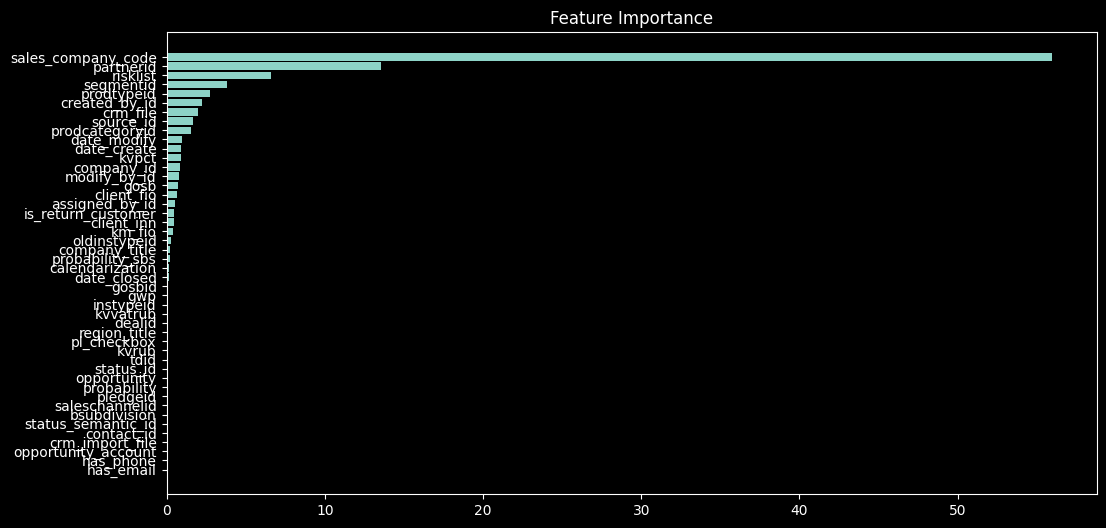

In [34]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')


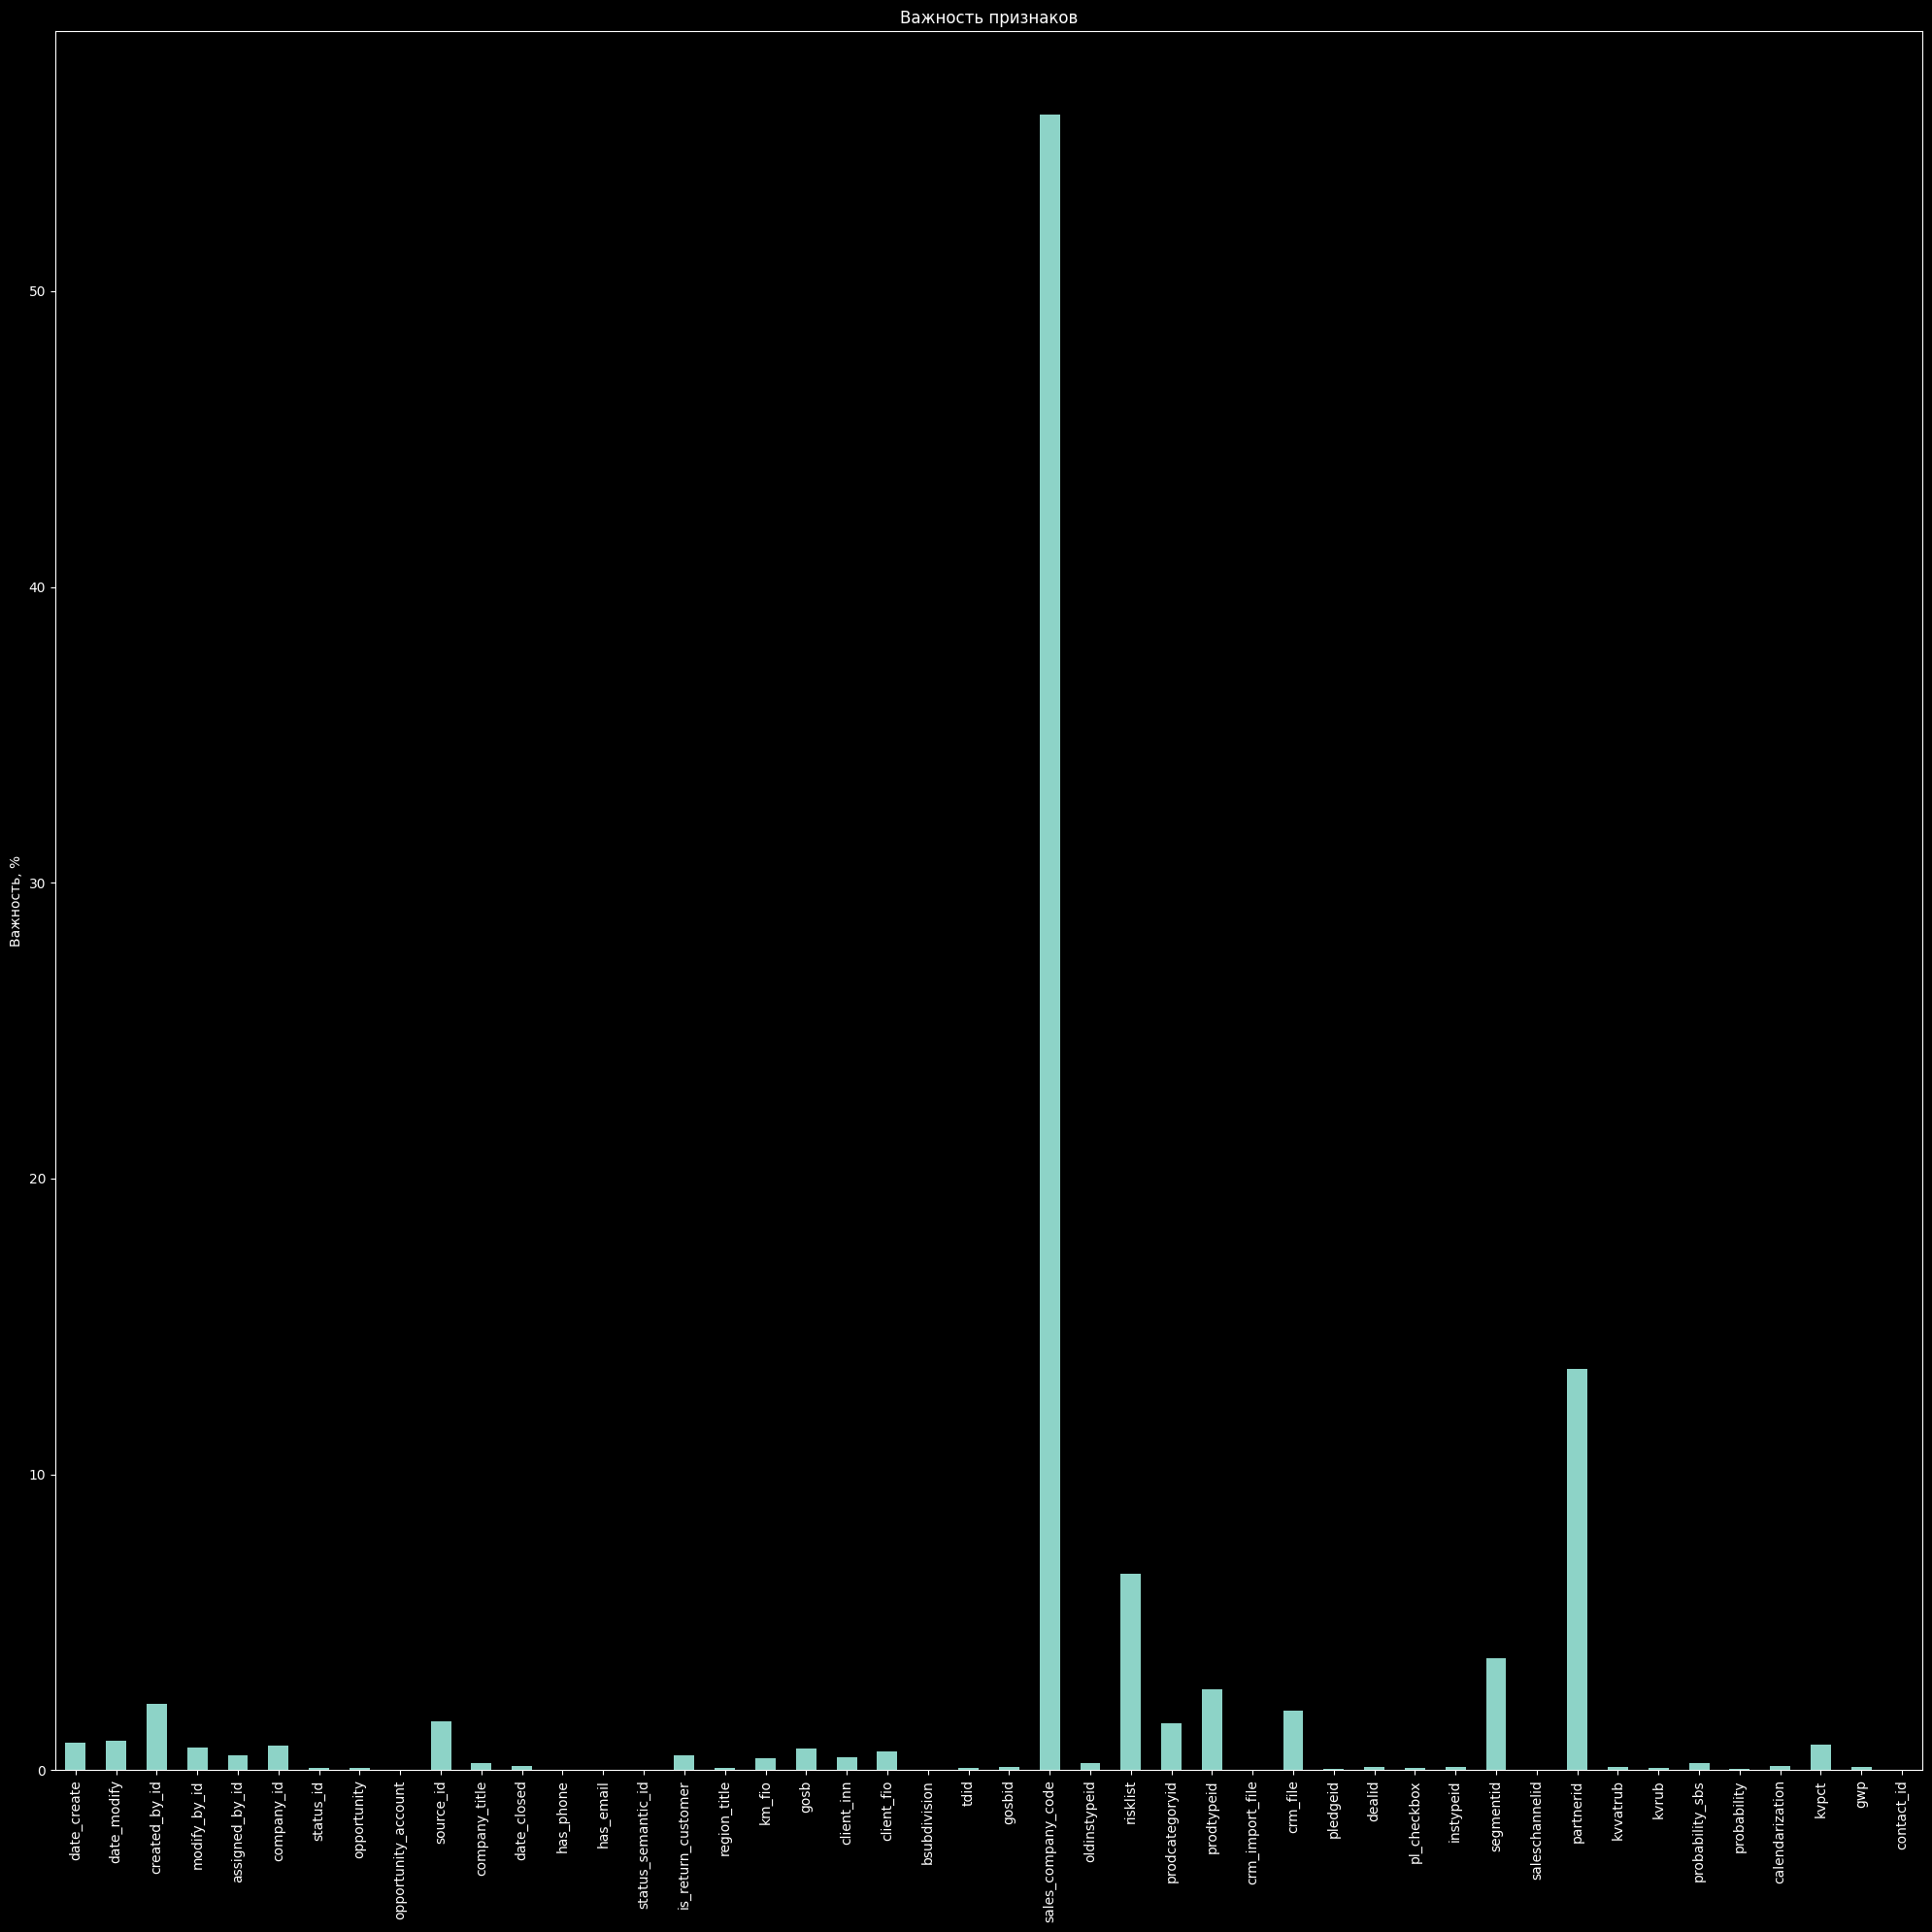

In [35]:
cat_iris_imp = pd.Series(model.get_feature_importance(),
                        df.drop(['opened'], axis=1).columns)
fig, ax = plt.subplots(figsize=(20,20))
cat_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

## Using Catboost directions Optuna


In [25]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)
    #kf = KFold(n_splits=10,random_state=42,shuffle=True)


    param = {
        'loss_function': trial.suggest_categorical('loss_function',['Logloss', 'CrossEntropy']), # CAN BE REMOVED  ,"MultiClass", "MultiClassOneVsAll","MultiCrossEntropy","MultiLogloss" 
        'eval_metric' : trial.suggest_categorical('eval_metric',['F1', 'CrossEntropy']),
        #'eval_metric' : trial.suggest_categorical('eval_metric',['HammingLoss','HingeLoss','NormalizedGini','AUC','MCC','BalancedErrorRate','BalancedAccuracy','F1',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']), # CAN BE REMOVED 
        #'eval_metric' : trial.suggest_categorical('eval_metric', ['Kappa']),
        #'eval_metric':trial.suggest_categorical('eval_metric',['ZeroOneLoss','HammingLoss','HingeLoss','BrierScore','NormalizedGini','QueryAUC','AUC','CtrFactor','Accuracy','MCC','BalancedErrorRate','BalancedAccuracy','F1','F',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']), # CAN BE REMOVED 
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature',1.00001, 17), #CAN BE REMOVED
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0), #CAN BE REMOVED
        'fold_permutation_block': trial.suggest_int('fold_permutation_block',1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1, 12), #CAN BE REMOVED
        'learning_rate': trial.suggest_float('learning_rate', 1e-7,1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12), #CAN BE REMOVED
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No','AnyImprovement']),
        'depth': trial.suggest_int('depth',1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 600,1),

        #"used_ram_limit": "12gb",


        #TODO:

        #Logloss, MultiClass, MultiClassOneVsAll and user-defined loss functions
        ####

        #'subsample': trial.suggest_float('subsample', 0.1, 1.0-(1e-6)),
        #Error: default bootstrap type (bayesian) doesn't support taken fraction option
        ####

        #'approx_on_full_history': trial.suggest_categorical('approx_on_full_history', [True, False]),
        #Can't use approx-on-full-history with Plain boosting-type
        ####

        #param['diffusion_temperature']= trial.suggest_float('diffusion_temperature', 100_00.00000, 100_000.00000)

        ####
        #'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

    }
    #ADDITIONAL SETTINGS

    #METRICS AND LOSS FUNCTIONS

    # if param["loss_function"] == "MultiCrossEntropy":
    #   param['eval_metric'] = trial.suggest_categorical('eval_metric',['ZeroOneLoss','HammingLoss','HingeLoss','NormalizedGini','AUC','MCC','BalancedErrorRate','BalancedAccuracy','F1',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']) # CAN BE REMOVED 

    # elif param["loss_function"] == "MultiLogloss":
    #   param['eval_metric'] = trial.suggest_categorical('eval_metric',['ZeroOneLoss','HammingLoss','HingeLoss','NormalizedGini','AUC','MCC','BalancedErrorRate','BalancedAccuracy','F1',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']) # CAN BE REMOVED 
    
    # else:
    #   param['eval_metric'] = trial.suggest_categorical('eval_metric',['ZeroOneLoss','HammingLoss','HingeLoss','NormalizedGini','AUC','MCC','BalancedErrorRate','BalancedAccuracy','F1',"LogLikelihoodOfPrediction","WKappa",'Kappa','Logloss','CrossEntropy','Recall']) # CAN BE REMOVED 


    #END OF THAT CRAP
    
    
    if param['loss_function'] not in ["MultiCrossEntropy","MultiLogloss", 'CrossEntropy']:
      param['auto_class_weights']= trial.suggest_categorical('auto_class_weights', ['None','Balanced','SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
      param['grow_policy']= 'SymmetricTree'

    if param["boosting_type"] == "Plain":
      param['grow_policy']= trial.suggest_categorical('grow_policy', ['SymmetricTree','Depthwise','Lossguide'])    


    if param["grow_policy"] != "Lossguide":
      param['sampling_frequency']= trial.suggest_categorical('sampling_frequency', ['PerTree','PerTreeLevel'])


    if param["langevin"]==True:
      param["posterior_sampling"] = trial.suggest_categorical('posterior_sampling', [True, False])
  
      if param["posterior_sampling"] == True:
        param['model_shrink_mode']= 'Constant'

      else:
        param['model_shrink_mode']= trial.suggest_categorical('model_shrink_mode', ['Constant', 'Decreasing'])


    #END OF SETTINGS

    print(param)
    model = cb.CatBoostClassifier(**param) 
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=500,verbose=False)


    #preds = model.predict(test_x)
    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    #return (model.score(test_x , test_y))

    ### ANOTHER METHOD ###

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.balanced_accuracy_score(test_y, pred_labels) #OR ROC_AUG OR accuracy_score

    preds_train = model.predict(train_x)
    pred_labels_train = np.rint(preds_train)
  
    joblib.dump(study, 'catboost_leads_directions.pkl')

    return accuracy , sklearn.metrics.accuracy_score(test_y, pred_labels) , sklearn.metrics.balanced_accuracy_score(train_y, pred_labels_train), sklearn.metrics.accuracy_score(train_y, pred_labels_train)

In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [27]:
%%time

if os.path.isfile('catboost_leads_directions.pkl'):
  study = joblib.load('catboost_leads_directions.pkl')
else:
    sampler = optuna.multi_objective.samplers.MOTPEMultiObjectiveSampler()
    study = optuna.create_study(directions=['maximize','maximize','maximize','maximize'], sampler=sampler)#,pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))

study.optimize(objective, n_trials=1_000, #gc_after_trial=True,
              show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])

C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()
  0%|          | 0/1000 [00:00<?, ?it/s]

{'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 16, 'bagging_temperature': 14.859527922462593, 'rsm': 0.3356757093767202, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 8, 'learning_rate': 0.3491647143551091, 'reg_lambda': 11.015570194424013, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 11, 'allow_const_label': True, 'fold_len_multiplier': 10.543687898398742, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 3654, 'max_bin': 471, 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree'}
{'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 13, 'bagging_temperature': 5.7737409950787395, 'rsm': 0.673676548547497, 'fold_permutation_block': 13, 'leaf_estimation_iterations': 8, 'learning_rate': 0.6660471698574875, 'reg_lambda': 9.052387018110338, 'leaf_estimation_backtracking': 'No', 'depth': 9, 'allow_const_label': True, 'fold_len_multiplier': 3.116176990780

C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


{'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'min_data_in_leaf': 11, 'bagging_temperature': 16.36905532247066, 'rsm': 0.7501184016710319, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 7, 'learning_rate': 0.09675719878463962, 'reg_lambda': 8.567052697462993, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 14, 'allow_const_label': False, 'fold_len_multiplier': 2.1156688717292647, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 4326, 'max_bin': 459, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTreeLevel'}
{'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'min_data_in_leaf': 15, 'bagging_temperature': 16.25898620929688, 'rsm': 0.02050526883008942, 'fold_permutation_block': 11, 'leaf_estimation_iterations': 3, 'learning_rate': 0.05737086298008054, 'reg_lambda': 9.141158329299245, 'leaf_estimation_backtracking': 'No', 'depth': 7, 'allow_const_label': False, 'fold_len_multiplier': 11.131748422572077, 

C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [02:20<?, ?it/s]

[I 2022-10-31 21:55:20,647] Trial 46 finished with values: [0.998759305210918, 0.9998666666666667, 1.0, 1.0] and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 8, 'bagging_temperature': 1.9167951050449297, 'rsm': 0.07316037806200862, 'fold_permutation_block': 7, 'leaf_estimation_iterations': 4, 'learning_rate': 0.6540090743097875, 'reg_lambda': 10.855463072613897, 'leaf_estimation_backtracking': 'No', 'depth': 1, 'allow_const_label': True, 'fold_len_multiplier': 7.1194954002830215, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 5017, 'max_bin': 257, 'auto_class_weights': 'SqrtBalanced', 'grow_policy': 'Lossguide'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [02:49<?, ?it/s]

[I 2022-10-31 21:55:49,202] Trial 40 finished with values: [0.9981037316644821, 0.9997333333333334, 0.9991568378045019, 0.9998285714285714] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'min_data_in_leaf': 15, 'bagging_temperature': 16.25898620929688, 'rsm': 0.02050526883008942, 'fold_permutation_block': 11, 'leaf_estimation_iterations': 3, 'learning_rate': 0.05737086298008054, 'reg_lambda': 9.141158329299245, 'leaf_estimation_backtracking': 'No', 'depth': 7, 'allow_const_label': False, 'fold_len_multiplier': 11.131748422572077, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5199, 'max_bin': 139, 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [07:00<?, ?it/s]

[I 2022-10-31 22:00:01,039] Trial 39 finished with values: [0.9999295476962097, 0.9998666666666667, 0.999969806763285, 0.9999428571428571] and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 7, 'bagging_temperature': 9.324966120433098, 'rsm': 0.6699258981360837, 'fold_permutation_block': 2, 'leaf_estimation_iterations': 2, 'learning_rate': 0.09690592650955687, 'reg_lambda': 3.1156749590484862, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 5, 'allow_const_label': False, 'fold_len_multiplier': 7.295539322294087, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 6171, 'max_bin': 218, 'auto_class_weights': 'SqrtBalanced', 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [08:59<?, ?it/s]

[I 2022-10-31 22:01:59,695] Trial 47 finished with values: [0.9987240790590229, 0.9998, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'min_data_in_leaf': 6, 'bagging_temperature': 14.970516193758911, 'rsm': 0.36685557922212547, 'fold_permutation_block': 5, 'leaf_estimation_iterations': 8, 'learning_rate': 0.19341169446706966, 'reg_lambda': 1.530844310681758, 'leaf_estimation_backtracking': 'No', 'depth': 8, 'allow_const_label': True, 'fold_len_multiplier': 4.724488115478168, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 2107, 'max_bin': 299, 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [14:53<?, ?it/s]

[I 2022-10-31 22:07:54,023] Trial 27 finished with values: [0.9993444264535639, 0.9998666666666667, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 5, 'bagging_temperature': 10.49880289879489, 'rsm': 0.23173328076511798, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 5, 'learning_rate': 0.184375728063932, 'reg_lambda': 7.904739971857724, 'leaf_estimation_backtracking': 'No', 'depth': 6, 'allow_const_label': False, 'fold_len_multiplier': 10.010827358944036, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 2200, 'max_bin': 159, 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [19:10<?, ?it/s]

[I 2022-10-31 22:12:10,184] Trial 36 finished with values: [0.9994363815696774, 0.9989333333333333, 0.9996074879227053, 0.9992571428571428] and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 11, 'bagging_temperature': 7.763778682652308, 'rsm': 0.06690981829648243, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 11, 'learning_rate': 0.7596966679646016, 'reg_lambda': 10.234779609078185, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 11, 'allow_const_label': True, 'fold_len_multiplier': 8.127893704942542, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6618, 'max_bin': 515, 'auto_class_weights': 'Balanced', 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [29:22<?, ?it/s]

[I 2022-10-31 22:22:22,340] Trial 29 finished with values: [0.9981389578163772, 0.9998, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 8, 'bagging_temperature': 13.922442521598228, 'rsm': 0.1910526951113034, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 3, 'learning_rate': 0.8950903758973413, 'reg_lambda': 2.8091424981606385, 'leaf_estimation_backtracking': 'No', 'depth': 5, 'allow_const_label': True, 'fold_len_multiplier': 4.018166441044144, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 3582, 'max_bin': 406, 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [34:06<?, ?it/s]

[I 2022-10-31 22:27:06,650] Trial 34 finished with values: [0.9999647738481048, 0.9999333333333333, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'min_data_in_leaf': 7, 'bagging_temperature': 3.6808443886144397, 'rsm': 0.40344151146498813, 'fold_permutation_block': 13, 'leaf_estimation_iterations': 11, 'learning_rate': 0.8091518039043789, 'reg_lambda': 4.641746292468031, 'leaf_estimation_backtracking': 'No', 'depth': 10, 'allow_const_label': False, 'fold_len_multiplier': 8.741961224942928, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6942, 'max_bin': 242, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': False, 'model_shrink_mode': 'Constant'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [37:54<?, ?it/s]

[I 2022-10-31 22:30:54,832] Trial 37 finished with values: [0.9981037316644821, 0.9997333333333334, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 10, 'bagging_temperature': 12.532475321942838, 'rsm': 0.3187031871198733, 'fold_permutation_block': 7, 'leaf_estimation_iterations': 9, 'learning_rate': 0.319876196683231, 'reg_lambda': 2.865690200752054, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 2, 'allow_const_label': True, 'fold_len_multiplier': 2.2982109527046224, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5315, 'max_bin': 196, 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [1:36:12<?, ?it/s]

[I 2022-10-31 23:29:12,470] Trial 30 finished with values: [0.9987240790590229, 0.9998, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 11, 'bagging_temperature': 10.125399918953798, 'rsm': 0.8168935071147267, 'fold_permutation_block': 8, 'leaf_estimation_iterations': 6, 'learning_rate': 0.3169077213307755, 'reg_lambda': 9.437928453931047, 'leaf_estimation_backtracking': 'No', 'depth': 6, 'allow_const_label': False, 'fold_len_multiplier': 6.018464384625521, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 4328, 'max_bin': 446, 'sampling_frequency': 'PerTreeLevel'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [2:00:35<?, ?it/s]

[I 2022-10-31 23:53:35,242] Trial 25 finished with values: [0.9993444264535639, 0.9998666666666667, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 13, 'bagging_temperature': 5.7737409950787395, 'rsm': 0.673676548547497, 'fold_permutation_block': 13, 'leaf_estimation_iterations': 8, 'learning_rate': 0.6660471698574875, 'reg_lambda': 9.052387018110338, 'leaf_estimation_backtracking': 'No', 'depth': 9, 'allow_const_label': True, 'fold_len_multiplier': 3.1161769907807724, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 3484, 'max_bin': 547, 'sampling_frequency': 'PerTreeLevel'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [2:05:31<?, ?it/s]

[I 2022-10-31 23:58:31,768] Trial 44 finished with values: [0.9999295476962097, 0.9998666666666667, 0.9999547101449275, 0.9999142857142858] and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 16, 'bagging_temperature': 4.86207665157751, 'rsm': 0.4299678473411706, 'fold_permutation_block': 8, 'leaf_estimation_iterations': 9, 'learning_rate': 0.2913394712125315, 'reg_lambda': 6.719032747311139, 'leaf_estimation_backtracking': 'No', 'depth': 15, 'allow_const_label': False, 'fold_len_multiplier': 8.341631646186338, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 6932, 'max_bin': 237, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTreeLevel'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [2:13:16<?, ?it/s]

[I 2022-11-01 00:06:16,317] Trial 24 finished with values: [0.9987240790590229, 0.9998, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 16, 'bagging_temperature': 14.859527922462593, 'rsm': 0.3356757093767202, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 8, 'learning_rate': 0.3491647143551091, 'reg_lambda': 11.015570194424013, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 11, 'allow_const_label': True, 'fold_len_multiplier': 10.543687898398742, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 3654, 'max_bin': 471, 'grow_policy': 'Depthwise', 'sampling_frequency': 'PerTree'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [2:38:16<?, ?it/s]

[I 2022-11-01 00:31:16,173] Trial 43 finished with values: [1.0, 1.0, 1.0, 1.0] and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 1, 'bagging_temperature': 6.759474974215578, 'rsm': 0.6383821905298074, 'fold_permutation_block': 9, 'leaf_estimation_iterations': 11, 'learning_rate': 0.2347711779891954, 'reg_lambda': 9.662643714880234, 'leaf_estimation_backtracking': 'No', 'depth': 8, 'allow_const_label': False, 'fold_len_multiplier': 8.21125652526176, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 5313, 'max_bin': 266, 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': True}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [2:41:13<?, ?it/s]

[I 2022-11-01 00:34:13,808] Trial 26 finished with values: [1.0, 1.0, 1.0, 1.0] and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 3, 'bagging_temperature': 11.47814252512135, 'rsm': 0.4126196457672877, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 3, 'learning_rate': 0.5038413947348755, 'reg_lambda': 5.061689856424976, 'leaf_estimation_backtracking': 'No', 'depth': 13, 'allow_const_label': False, 'fold_len_multiplier': 7.568834451456576, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 2753, 'max_bin': 256, 'auto_class_weights': 'SqrtBalanced', 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [3:01:51<?, ?it/s]

[I 2022-11-01 00:54:51,399] Trial 35 finished with values: [0.9999647738481048, 0.9999333333333333, 0.9999849033816426, 0.9999714285714286] and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 11, 'bagging_temperature': 1.93108884978587, 'rsm': 0.08894054065088801, 'fold_permutation_block': 7, 'leaf_estimation_iterations': 2, 'learning_rate': 0.37510283643576636, 'reg_lambda': 5.575000835948284, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 12, 'allow_const_label': True, 'fold_len_multiplier': 9.379544687610986, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 5071, 'max_bin': 538, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTreeLevel'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [3:17:00<?, ?it/s]

[I 2022-11-01 01:10:01,030] Trial 38 finished with values: [0.9999295476962097, 0.9998666666666667, 0.9999849033816426, 0.9999714285714286] and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 15, 'bagging_temperature': 5.108385518720715, 'rsm': 0.4054565247497284, 'fold_permutation_block': 6, 'leaf_estimation_iterations': 8, 'learning_rate': 0.9855233912967685, 'reg_lambda': 6.888325859902212, 'leaf_estimation_backtracking': 'No', 'depth': 15, 'allow_const_label': False, 'fold_len_multiplier': 8.907728253699968, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 5934, 'max_bin': 279, 'auto_class_weights': 'None', 'sampling_frequency': 'PerTree'}. 


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  0%|          | 0/1000 [3:17:51<?, ?it/s]

[I 2022-11-01 01:10:52,028] Trial 28 finished with values: [0.9993092003016688, 0.9998, 0.9999245169082125, 0.9998571428571429] and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 14, 'bagging_temperature': 14.075746345893862, 'rsm': 0.14487965108042475, 'fold_permutation_block': 5, 'leaf_estimation_iterations': 4, 'learning_rate': 0.849374794470703, 'reg_lambda': 4.567890782957235, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 15, 'allow_const_label': False, 'fold_len_multiplier': 3.881207512490425, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 4579, 'max_bin': 358, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTree'}. 


In [25]:
study = joblib.load('catboost_leads_directions.pkl')

In [ ]:
optuna.visualization.plot_optimization_history(study)


In [ ]:
optuna.visualization.plot_parallel_coordinate(study)


In [ ]:
optuna.visualization.plot_slice(study)


In [ ]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 35
Best trial: {'loss_function': 'MultiLogloss', 'min_data_in_leaf': 2, 'bagging_temperature': 1.585664075268137, 'rsm': 0.5917735538697605, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 2, 'learning_rate': 0.6964507381860883, 'reg_lambda': 3.0755308956530776, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 5, 'allow_const_label': False, 'fold_len_multiplier': 11.767974350933722, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 4225, 'max_bin': 570, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree'}


In [ ]:
Best_trial = study.best_trial.params
Best_trial

{'loss_function': 'MultiLogloss',
 'min_data_in_leaf': 2,
 'bagging_temperature': 1.585664075268137,
 'rsm': 0.5917735538697605,
 'fold_permutation_block': 1,
 'leaf_estimation_iterations': 2,
 'learning_rate': 0.6964507381860883,
 'reg_lambda': 3.0755308956530776,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'depth': 5,
 'allow_const_label': False,
 'fold_len_multiplier': 11.767974350933722,
 'score_function': 'Cosine',
 'boosting_type': 'Plain',
 'langevin': False,
 'iterations': 4225,
 'max_bin': 570,
 'grow_policy': 'SymmetricTree',
 'sampling_frequency': 'PerTree'}

In [ ]:
study.best_trial.value


0.9998986544428333

In [ ]:
model = cb.CatBoostClassifier()  


NameError: name 'cb' is not defined

In [ ]:
model.set_params(**study.best_params)
model.fit(X, y)

In [ ]:
model.get_feature_importance

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [ ]:
cat_iris_imp = pd.Series(model.get_feature_importance(),
                        df.drop(['opened'], axis=1).columns)
fig, ax = plt.subplots(figsize=(20,20))
cat_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

## Using Catboost CV Optuna


In [98]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)


    param = {
      'loss_function': trial.suggest_categorical('loss_function',['Logloss', 'CrossEntropy']), # ,"MultiLogloss" ,"MultiCrossEntropy" ,"MultiClass" , "MultiClassOneVsAll"  # CAN BE REMOVED  
      
      'eval_metric' : trial.suggest_categorical('eval_metric',[ 'F1', 'CrossEntropy',"MCC","BalancedAccuracy"]),#
      
      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1, 17),
      'bagging_temperature': trial.suggest_float('bagging_temperature',1.00001, 17), #CAN BE REMOVED
      'rsm': trial.suggest_float('rsm', 1e-6, 1.0), #CAN BE REMOVED
      'fold_permutation_block': trial.suggest_int('fold_permutation_block',1, 15),
      'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1, 12), #CAN BE REMOVED
      'learning_rate': trial.suggest_float('learning_rate', 1e-7,1),
      'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12), #CAN BE REMOVED
      'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No','AnyImprovement']),
      'depth': trial.suggest_int('depth',1, 16),
      'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
      'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
      'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

      'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

      'langevin': trial.suggest_categorical('langevin', [True, False]),

      'iterations': trial.suggest_int('iterations', 2000, 7000),
      'max_bin': trial.suggest_int('max_bin', 90, 1_000,1),
      'verbose':0
      #"used_ram_limit": "12gb",

    }

    #"""
    if param['loss_function'] not in ["MultiCrossEntropy","MultiLogloss", 'CrossEntropy']:
      param['auto_class_weights']= trial.suggest_categorical('auto_class_weights', ['None','Balanced','SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
      param['grow_policy']= 'SymmetricTree'

    if param["boosting_type"] == "Plain":
      param['grow_policy']= trial.suggest_categorical('grow_policy', ['SymmetricTree','Depthwise','Lossguide'])    


    if param["grow_policy"] != "Lossguide":
      param['sampling_frequency']= trial.suggest_categorical('sampling_frequency', ['PerTree','PerTreeLevel'])


    if param["langevin"]==True:
      param["posterior_sampling"] = trial.suggest_categorical('posterior_sampling', [True, False])
  
      if param["posterior_sampling"] == True:
        param['model_shrink_mode']= 'Constant'

      else:
        param['model_shrink_mode']= trial.suggest_categorical('model_shrink_mode', ['Constant', 'Decreasing'])


    #END OF SETTINGS
    #"""
    print(param)
    model = cb.CatBoostClassifier(**param)  

    joblib.dump(study, 'catboost_deals_CV.pkl')

    if (param['eval_metric'] == "F1"):
      return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='f1', n_jobs=-1))
    if (param['eval_metric'] == "BalancedAccuracy"):
      return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='balanced_accuracy', n_jobs=-1))
    if (param['eval_metric'] == "MCC"):
      return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='matthews_corrcoef', n_jobs=-1))
    if (param['eval_metric'] == "CrossEntropy"):
      return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='neg_log_loss', n_jobs=-1))+1


    #return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='f1', n_jobs=-1))
    # scores = sklearn.model_selection.cross_validate(model, X, y, cv=10, scoring="f1", n_jobs=-1)
    # print(scores['test_score'])
    # return statistics.mean(scores['test_score'])


In [99]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [100]:
%%time

if os.path.isfile('catboost_deals_CV.pkl'):
  study = joblib.load('catboost_deals_CV.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', sampler=sampler)

study.optimize(objective, n_trials=1_000, #gc_after_trial=True,
              show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])

c:\Users\DASolodennikov\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\samplers\_tpe\sampler.py:281: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2022-11-23 15:53:56,673] A new study created in memory with name: no-name-722dbac5-975f-4006-a6cd-48bd98fa8e5f
c:\Users\DASolodennikov\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\progress_bar.py:49: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.

  0%|          | 0/1000 [00:00<?, ?it/s]

{'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 3, 'bagging_temperature': 12.24866917764035, 'rsm': 0.7830751833899746, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 11, 'learning_rate': 0.2909826749993314, 'reg_lambda': 4.356590485658264, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 3, 'allow_const_label': False, 'fold_len_multiplier': 5.326628847439736, 'score_function': 'L2', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 2641, 'max_bin': 869, 'verbose': 0, 'auto_class_weights': 'None', 'grow_policy': 'Lossguide', 'posterior_sampling': True, 'model_shrink_mode': 'Constant'}
{'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 9, 'bagging_temperature': 12.598087548600985, 'rsm': 0.4636448490458353, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 6, 'learning_rate': 0.46011583353597674, 'reg_lambda': 10.697223973417904, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth':

  0%|          | 1/1000 [17:15:05<17234:09:50, 62105.10s/it]

[I 2022-11-24 09:09:01,763] Trial 1 finished with value: 0.9619922142044679 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 3, 'bagging_temperature': 12.24866917764035, 'rsm': 0.7830751833899746, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 11, 'learning_rate': 0.2909826749993314, 'reg_lambda': 4.356590485658264, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 3, 'allow_const_label': False, 'fold_len_multiplier': 5.326628847439736, 'score_function': 'L2', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 2641, 'max_bin': 869, 'auto_class_weights': 'None', 'grow_policy': 'Lossguide', 'posterior_sampling': True}. Best is trial 1 with value: 0.9619922142044679.

AHTUNG
Trial 1 finished with best value: 0.9619922142044679 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 3, 'bagging_temperature': 12.24866917764035, 'rsm': 0.7830751833899746, 'fold_permutation_block': 12, 'leaf_estima

  0%|          | 2/1000 [22:13:05<10005:06:19, 36090.56s/it]

[I 2022-11-24 14:07:02,154] Trial 0 finished with value: 0.9107013911230438 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'MCC', 'min_data_in_leaf': 4, 'bagging_temperature': 14.32351877828557, 'rsm': 0.9497302026756494, 'fold_permutation_block': 3, 'leaf_estimation_iterations': 8, 'learning_rate': 0.048184082096097085, 'reg_lambda': 3.905112772665187, 'leaf_estimation_backtracking': 'No', 'depth': 8, 'allow_const_label': False, 'fold_len_multiplier': 10.624242482913196, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 3310, 'max_bin': 738, 'sampling_frequency': 'PerTree'}. Best is trial 1 with value: 0.9619922142044679.
{'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 5, 'bagging_temperature': 6.3739961603676125, 'rsm': 0.5345187881920473, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 8, 'learning_rate': 0.6931344924295666, 'reg_lambda': 5.649727432255115, 'leaf_estimation_back

  0%|          | 3/1000 [31:21:57<9595:38:50, 34648.28s/it] 

[I 2022-11-24 23:15:54,104] Trial 4 finished with value: 0.9608524108420947 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 14, 'bagging_temperature': 3.3792110522378285, 'rsm': 0.5397316310760991, 'fold_permutation_block': 9, 'leaf_estimation_iterations': 4, 'learning_rate': 0.47849582974073873, 'reg_lambda': 11.458415305386511, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 11, 'allow_const_label': True, 'fold_len_multiplier': 11.353582546404162, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 3436, 'max_bin': 552, 'auto_class_weights': 'None', 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree', 'posterior_sampling': False, 'model_shrink_mode': 'Decreasing'}. Best is trial 1 with value: 0.9619922142044679.
{'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 5, 'bagging_temperature': 1.043316278550816, 'rsm': 0.2879323260526467, 'fold_permutation_block'

  0%|          | 4/1000 [34:15:35<6939:27:56, 25082.41s/it]

[I 2022-11-25 02:09:32,019] Trial 2 finished with value: 0.959498970066077 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 11, 'bagging_temperature': 4.024068134406692, 'rsm': 0.6303012935734681, 'fold_permutation_block': 2, 'leaf_estimation_iterations': 10, 'learning_rate': 0.7670164059109463, 'reg_lambda': 1.2026481216467402, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 2, 'allow_const_label': False, 'fold_len_multiplier': 3.1384766270942914, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 5720, 'max_bin': 455, 'auto_class_weights': 'None', 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTreeLevel'}. Best is trial 1 with value: 0.9619922142044679.
{'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 9, 'bagging_temperature': 7.723994032312362, 'rsm': 0.7075693048495255, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 5, 'learning_rate': 0.968

  0%|          | 5/1000 [35:35:27<4910:13:19, 17765.63s/it]

[I 2022-11-25 03:29:24,276] Trial 7 finished with value: 0.9456090034114399 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 2, 'bagging_temperature': 12.681573484160825, 'rsm': 0.5959674003953653, 'fold_permutation_block': 2, 'leaf_estimation_iterations': 12, 'learning_rate': 0.06061062759860982, 'reg_lambda': 10.24823658825695, 'leaf_estimation_backtracking': 'No', 'depth': 5, 'allow_const_label': True, 'fold_len_multiplier': 2.4125800778797073, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 2205, 'max_bin': 682, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTreeLevel'}. Best is trial 1 with value: 0.9619922142044679.
{'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 3, 'bagging_temperature': 12.35346327608473, 'rsm': 0.8892843853293526, 'fold_permutation_block': 7, 'leaf_estimation_iterations': 8, 'learning_rate': 0.9640929698543675, 'reg_

  1%|          | 6/1000 [36:43:20<3619:48:59, 13110.00s/it]

[I 2022-11-25 04:37:16,917] Trial 3 finished with value: 0.9483595311291589 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 9, 'bagging_temperature': 12.598087548600985, 'rsm': 0.4636448490458353, 'fold_permutation_block': 15, 'leaf_estimation_iterations': 6, 'learning_rate': 0.46011583353597674, 'reg_lambda': 10.697223973417904, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 11, 'allow_const_label': True, 'fold_len_multiplier': 11.598754180316924, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 2136, 'max_bin': 767, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. Best is trial 1 with value: 0.9619922142044679.
{'loss_function': 'CrossEntropy', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 8, 'bagging_temperature': 1.9703411412205472, 'rsm': 0.742498921134939, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 5, 'learnin

  1%|          | 7/1000 [39:07:56<3216:19:52, 11660.42s/it]

[I 2022-11-25 07:01:52,904] Trial 6 finished with value: 0.13613639157343319 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 11, 'bagging_temperature': 3.4997802941787715, 'rsm': 0.5364558438753785, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 12, 'learning_rate': 0.24996701532476814, 'reg_lambda': 7.190789198100414, 'leaf_estimation_backtracking': 'No', 'depth': 8, 'allow_const_label': False, 'fold_len_multiplier': 3.1348767328835576, 'score_function': 'Cosine', 'boosting_type': 'Ordered', 'langevin': True, 'iterations': 6280, 'max_bin': 147, 'auto_class_weights': 'Balanced', 'sampling_frequency': 'PerTreeLevel', 'posterior_sampling': False, 'model_shrink_mode': 'Constant'}. Best is trial 1 with value: 0.9619922142044679.
{'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 4, 'bagging_temperature': 7.022911969555016, 'rsm': 0.034828481971200406, 'fold_permutation_block': 8, 'leaf_estimat

  1%|          | 8/1000 [40:34:04<2643:33:26, 9593.55s/it] 

[I 2022-11-25 08:28:00,952] Trial 8 finished with value: 0.9470931535166829 and parameters: {'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 14, 'bagging_temperature': 12.964180897805072, 'rsm': 0.2588301360124772, 'fold_permutation_block': 9, 'leaf_estimation_iterations': 1, 'learning_rate': 0.8456704439815506, 'reg_lambda': 1.3492219943678099, 'leaf_estimation_backtracking': 'No', 'depth': 9, 'allow_const_label': False, 'fold_len_multiplier': 6.870150022716089, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': True, 'iterations': 5871, 'max_bin': 222, 'auto_class_weights': 'SqrtBalanced', 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree', 'posterior_sampling': True}. Best is trial 1 with value: 0.9619922142044679.
{'loss_function': 'Logloss', 'eval_metric': 'CrossEntropy', 'min_data_in_leaf': 7, 'bagging_temperature': 15.609204162845622, 'rsm': 0.07667883226745391, 'fold_permutation_block': 3, 'leaf_estimation_iteration

  1%|          | 9/1000 [41:05:44<1978:50:54, 7188.55s/it]

[I 2022-11-25 08:59:41,330] Trial 9 finished with value: 0.9412918380470245 and parameters: {'loss_function': 'CrossEntropy', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 5, 'bagging_temperature': 6.3739961603676125, 'rsm': 0.5345187881920473, 'fold_permutation_block': 12, 'leaf_estimation_iterations': 8, 'learning_rate': 0.6931344924295666, 'reg_lambda': 5.649727432255115, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 2, 'allow_const_label': True, 'fold_len_multiplier': 7.78882849315042, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 3412, 'max_bin': 359, 'sampling_frequency': 'PerTree'}. Best is trial 1 with value: 0.9619922142044679.
{'loss_function': 'Logloss', 'eval_metric': 'F1', 'min_data_in_leaf': 8, 'bagging_temperature': 7.595138413532704, 'rsm': 0.5247166645309408, 'fold_permutation_block': 10, 'leaf_estimation_iterations': 3, 'learning_rate': 0.14377871469258968, 'reg_lambda': 7.307141156118018, 'leaf_estimation_b

: 

In [49]:
study = joblib.load('catboost_deals_CV.pkl')

In [50]:
optuna.visualization.plot_optimization_history(study)


In [51]:
optuna.visualization.plot_parallel_coordinate(study)


[W 2022-11-22 15:16:36,409] Your study has only completed trials with missing parameters.


In [47]:
optuna.visualization.plot_slice(study)


[W 2022-10-31 13:25:59,831] Your study does not have any completed trials.


In [52]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 20
Best trial: {'loss_function': 'Logloss', 'eval_metric': 'BalancedAccuracy', 'min_data_in_leaf': 1, 'bagging_temperature': 12.909581790979116, 'rsm': 0.6596207511978085, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 1, 'learning_rate': 0.25913725705228424, 'reg_lambda': 10.895644240207025, 'leaf_estimation_backtracking': 'No', 'depth': 6, 'allow_const_label': False, 'fold_len_multiplier': 8.153351177359424, 'score_function': 'L2', 'boosting_type': 'Ordered', 'langevin': False, 'iterations': 5302, 'max_bin': 994, 'auto_class_weights': 'SqrtBalanced', 'sampling_frequency': 'PerTree'}


In [53]:
Best_trial = study.best_trial.params
Best_trial

{'loss_function': 'Logloss',
 'eval_metric': 'BalancedAccuracy',
 'min_data_in_leaf': 1,
 'bagging_temperature': 12.909581790979116,
 'rsm': 0.6596207511978085,
 'fold_permutation_block': 1,
 'leaf_estimation_iterations': 1,
 'learning_rate': 0.25913725705228424,
 'reg_lambda': 10.895644240207025,
 'leaf_estimation_backtracking': 'No',
 'depth': 6,
 'allow_const_label': False,
 'fold_len_multiplier': 8.153351177359424,
 'score_function': 'L2',
 'boosting_type': 'Ordered',
 'langevin': False,
 'iterations': 5302,
 'max_bin': 994,
 'auto_class_weights': 'SqrtBalanced',
 'sampling_frequency': 'PerTree'}

In [54]:
study.best_trial.value


0.972798376169896

In [55]:
model = cb.CatBoostClassifier()  


In [56]:
model.set_params(**study.best_params)
model.fit(X, y)

0:	learn: 0.9332322	total: 383ms	remaining: 33m 50s
1:	learn: 0.9333287	total: 618ms	remaining: 27m 17s
2:	learn: 0.9335003	total: 791ms	remaining: 23m 17s
3:	learn: 0.9330206	total: 1.03s	remaining: 22m 43s
4:	learn: 0.9367893	total: 1.26s	remaining: 22m 14s
5:	learn: 0.9370185	total: 1.64s	remaining: 24m 5s
6:	learn: 0.9383895	total: 1.87s	remaining: 23m 34s
7:	learn: 0.9389679	total: 2.09s	remaining: 23m 4s
8:	learn: 0.9394028	total: 2.35s	remaining: 22m 59s
9:	learn: 0.9392345	total: 2.58s	remaining: 22m 44s
10:	learn: 0.9395145	total: 2.82s	remaining: 22m 35s
11:	learn: 0.9397821	total: 2.95s	remaining: 21m 41s
12:	learn: 0.9400084	total: 3.2s	remaining: 21m 42s
13:	learn: 0.9405001	total: 3.45s	remaining: 21m 41s
14:	learn: 0.9406026	total: 3.61s	remaining: 21m 12s
15:	learn: 0.9406974	total: 3.74s	remaining: 20m 36s
16:	learn: 0.9412321	total: 3.99s	remaining: 20m 40s
17:	learn: 0.9412629	total: 4.2s	remaining: 20m 32s
18:	learn: 0.9414172	total: 4.32s	remaining: 20m
19:	learn: 

Text(0.5, 1.0, 'Feature Importance')

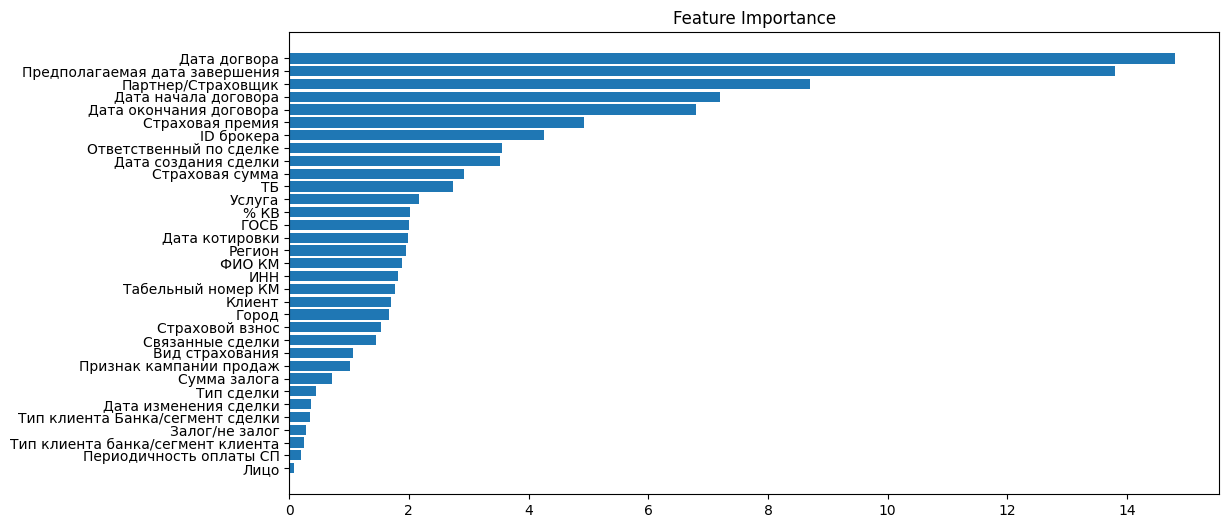

In [57]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')
# Remove first 4 dates 